In [ ]:
import pdfplumber
"""
This script extracts text from a PDF file using the pdfplumber library.
The script performs the following steps:
1. Imports the pdfplumber library.
2. Defines the path to the PDF file.
3. Initializes a variable to store all extracted text.
4. Opens the PDF file and iterates through each page.
5. Extracts text from each page and appends it to the all_text variable.
6. Prints the concatenated text from all pages.
Variables:
    pdf_path (str): The path to the PDF file.
    all_text (str): A variable to store the concatenated text from all pages.
Usage:
    Run the script to extract and print the text from the specified PDF file.
"""

pdf_path = "LAUTECH 2ND VERIFIED DATA.pdf"

# Initialize a variable to store all text
all_text = ""

with pdfplumber.open(pdf_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        # Extract text from the current page
        text = page.extract_text()
        
        # Append the text to the all_text variable
        if text:  # Check if text is not None
            all_text += f"\n{text}\n\n"

# Now all_text contains the concatenated text from all pages
print("All Extracted Text:")
print(all_text)

All Extracted Text:

sn first_name middle_name last_name matric_numberjamb_number institution location current fees account_name account_number level course_of_study
1Bukunmi Emmanuel Adekunle 2022001947 202210144649BA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 ADEKUNLE BUKUNMI EMMANUEL 2302285619 200BNSC Nursing
2John Sunday Okyere 2022008283 202210769930FF Ladoke Akintola University of Technology Oyo State OYO 126,000.00 OKYERE JOHN SUNDAY 6548306014 200B.Tech Computer Science
3Lateef Kewulabi Kareem 2022010541 202211356201CA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 KAREEM KEWULABI LATEEF 2074877766 200B.Tech ESTATE MANAGEMENT
4Ebenezer Oluwafunmisho Agoro 2022004301 202211380445CA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 AGORO EBENEZER OLUWAFUNMISHO 8484391013 200B.Sc Economics
5Waris Olamilekan Buliamin 2022010291 202210648196GA Ladoke Akintola University of Technology Oyo State OYO 126,000.00 BULIAMIN WARIS O

In [2]:
data = all_text
"""
Assigns the content of the variable `all_text` to the variable `data`.

Variables:
    data (str): A string containing the text data from the variable `all_text`.
"""

In [16]:
import pandas as pd
import re

# Split the data into rows
rows = data.strip().split("\n")

# Define the column headers
columns = [
    "sn", "first_name", "middle_name", "last_name", "matric_number", "jamb_number",
    "institution", "location", "current_fees", "account_name", "account_number",
    "level", "course_of_study"
]

# Initialize lists to store processed data and inconsistent lines
processed_data = []
inconsistent_lines = []

# Process each row
for row in rows:
    try:
        # Use regex to separate sn and the rest of the row
        match = re.match(r"(\d+)(.*)", row)
        if match:
            sn = match.group(1)
            rest = match.group(2).strip()
            # Split the rest of the data by spaces
            parts = rest.split()
            if len(parts) < 19:  # Check if the line has enough fields
                raise ValueError("Insufficient fields in line")
            
            # Extract individual fields from the parts
            first_name, middle_name, last_name = parts[0], parts[1], parts[2]
            matric_number, jamb_number = parts[3], parts[4]
            institution = " ".join(parts[5:12])  # Multi-word institution name
            location = parts[12]
            current_fees = parts[13]
            account_name = " ".join(parts[14:17])  # Multi-word account name
            account_number = parts[17]
            level = parts[18][:3]  # Extract level
            course_of_study = " ".join(parts[18:]).replace(level, "").strip()  # Remove level from course
            
            # Append the processed data to the list
            processed_data.append([
                sn, first_name, middle_name, last_name, matric_number, jamb_number,
                institution, location, current_fees, account_name, account_number,
                level, course_of_study
            ])
        else:
            raise ValueError("SN and rest split failed")
    except Exception as e:
        # Append the inconsistent line and error message to the list
        inconsistent_lines.append((row, str(e)))

# Create a DataFrame for the processed data
df = pd.DataFrame(processed_data, columns=columns)

# Display the DataFrame
print("Processed DataFrame:")
print(df)

# Display inconsistent lines
print("\nInconsistent Lines:")
for line, error in inconsistent_lines:
    print(f"Line: {line}\nError: {error}\n")


Processed DataFrame:
      sn first_name    middle_name last_name matric_number     jamb_number  \
0      1    Bukunmi       Emmanuel  Adekunle    2022001947  202210144649BA   
1      2       John         Sunday    Okyere    2022008283  202210769930FF   
2      3     Lateef       Kewulabi    Kareem    2022010541  202211356201CA   
3      4   Ebenezer  Oluwafunmisho     Agoro    2022004301  202211380445CA   
4      5      Waris     Olamilekan  Buliamin    2022010291  202210648196GA   
..   ...        ...            ...       ...           ...             ...   
659  662   Abdsalam       Adekunle   Adewale    2021000020      10540369CA   
660  663    Tiamiyu          Taiwo  Oyeladun    2021001172      10630857FJ   
661  664      Basit      Olasubomi  Oyetunji    2021005328      10669788FE   
662  665   Damilola         Esther    Sunday        205782      21884122BA   
663  666     Victor    Oluwarotimi  Adesokan        203844      21960277JA   

                                          

In [ ]:
df
"""
This code snippet references a DataFrame object named 'df' which is likely used for loan data analysis.

Attributes:
    df (DataFrame): A pandas DataFrame containing loan data. The specific structure and contents of this DataFrame are not detailed in the snippet.

Note:
    The file path provided suggests that this code is part of a Jupyter Notebook located at:
    /c:/Users/DELL/Desktop/loan data/Loan Data Analysis.ipynb
"""

,sn,first_name,middle_name,last_name,matric_number,jamb_number,institution,location,current_fees,account_name,account_number,level,course_of_study
0,1,Bukunmi,Emmanuel,Adekunle,2022001947,202210144649BA,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",ADEKUNLE BUKUNMI EMMANUEL,2302285619,200,BNSC Nursing
1,2,John,Sunday,Okyere,2022008283,202210769930FF,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",OKYERE JOHN SUNDAY,6548306014,200,B.Tech Computer Science
2,3,Lateef,Kewulabi,Kareem,2022010541,202211356201CA,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",KAREEM KEWULABI LATEEF,2074877766,200,B.Tech ESTATE MANAGEMENT
3,4,Ebenezer,Oluwafunmisho,Agoro,2022004301,202211380445CA,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",AGORO EBENEZER OLUWAFUNMISHO,8484391013,200,B.Sc Economics
4,5,Waris,Olamilekan,Buliamin,2022010291,202210648196GA,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",BULIAMIN WARIS OLAMILEKAN,672366816,200,B.Tech Computer Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,662,Abdsalam,Adekunle,Adewale,2021000020,10540369CA,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",ADEWALE ABDSALAM ADEKUNLE,2131412503,400,B.Sc Accounting
660,663,Tiamiyu,Taiwo,Oyeladun,2021001172,10630857FJ,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",OYELADUN TIAMIYU TAIWO,1534485767,400,B.Tech Computer Science
661,664,Basit,Olasubomi,Oyetunji,2021005328,10669788FE,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",OYETUNJI BASIT OLASUBOMI,8069988912,400,B.Tech Computer Science
662,665,Damilola,Esther,Sunday,205782,21884122BA,Ladoke Akintola University of Technology Oyo S...,OYO,"126,000.00",SUNDAY DAMILOLA ESTHER,1481234313,400,B.Tech Pure And Applied Biology


In [18]:
# Drop unnecessary columns
"""
This code snippet performs the following operations:
1. Drops unnecessary columns from the DataFrame `df`.
    The columns to be dropped are specified in the list `columns_to_drop`:
    - 'jamb_number'
    - 'institution'
    - 'location'
    - 'current_fees'
    - 'account_name'
2. Displays the cleaned DataFrame `df` after the specified columns have been removed.
"""
columns_to_drop = ['jamb_number', 'institution', 'location', 'current_fees', 'account_name', 'sn']
df = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
0,1,Bukunmi,Emmanuel,Adekunle,2022001947,2302285619,200,BNSC Nursing
1,2,John,Sunday,Okyere,2022008283,6548306014,200,B.Tech Computer Science
2,3,Lateef,Kewulabi,Kareem,2022010541,2074877766,200,B.Tech ESTATE MANAGEMENT
3,4,Ebenezer,Oluwafunmisho,Agoro,2022004301,8484391013,200,B.Sc Economics
4,5,Waris,Olamilekan,Buliamin,2022010291,672366816,200,B.Tech Computer Science
...,...,...,...,...,...,...,...,...
659,662,Abdsalam,Adekunle,Adewale,2021000020,2131412503,400,B.Sc Accounting
660,663,Tiamiyu,Taiwo,Oyeladun,2021001172,1534485767,400,B.Tech Computer Science
661,664,Basit,Olasubomi,Oyetunji,2021005328,8069988912,400,B.Tech Computer Science
662,665,Damilola,Esther,Sunday,205782,1481234313,400,B.Tech Pure And Applied Biology


In [20]:
df.sample(100)

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
477,480,AkinfolahanmMialik,Akinlade,2021000231,10901318IB,400B.Tech,Cyb,er Security Science
452,455,MusbaudeenOpeyemi,Olarinde,2021000484,10355788IH,400B.Tech,Pur,e And Applied Biology
316,319,Ramota,Ajoke,Adesokan,192470,3147335178,300,B.Tech Food Science
166,169,Esther,Olajumoke,Omolade,2022002701,677080261,200,B.Tech Biochemistry
89,92,Abdulmuiz,Olamide,Hussain,2022005994,1232055008,200,B.Sc Economics
...,...,...,...,...,...,...,...,...
255,258,Rehoboth,Inioluwa,Awoleye,197222,2222554240,300,B.Tech Animal Production and Health
333,336,Hassanat,Folashade,Babatunde,191736,2108952834,300,B.Tech Nutrition and Dietetics
519,522,Islamiyat,Omotola,Kareem,2021004038,2428699853,400,B.Sc Marketing
388,391,Peace,Oluwaseun,Oshatola,2021007089,8167040459,400,B.Tech Crop Production and Soil Science


In [19]:
df["level"].value_counts()
"""
Counts the unique values in the "level" column of the DataFrame `df`.

Returns:
    pandas.Series: A series containing counts of unique values in the "level" column, sorted in descending order.
"""

level
400    297
200    215
300     97
Pur      7
Com      5
Phy      4
Nut      4
Ele      3
Ani      3
Nur      3
Bio      2
Acc      2
Inf      2
Cyb      2
Cro      2
Sci      2
Pro      2
Mar      1
And      1
Foo      1
115      1
ZAI      1
Aja      1
180      1
Eng      1
Sta      1
Med      1
Sec      1
EST      1
Name: count, dtype: int64

In [21]:
# Filter the DataFrame to keep only rows where the level is 400, 300, or 200
"""
Filters the DataFrame to keep only rows where the 'level' column has values '400', '300', or '200',
and then displays the filtered DataFrame.

Returns:
    DataFrame: A DataFrame containing only the rows where the 'level' column is '400', '300', or '200'.
"""
df = df[df['level'].isin(['400', '300', '200'])]

# Display the filtered DataFrame
df

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
0,1,Bukunmi,Emmanuel,Adekunle,2022001947,2302285619,200,BNSC Nursing
1,2,John,Sunday,Okyere,2022008283,6548306014,200,B.Tech Computer Science
2,3,Lateef,Kewulabi,Kareem,2022010541,2074877766,200,B.Tech ESTATE MANAGEMENT
3,4,Ebenezer,Oluwafunmisho,Agoro,2022004301,8484391013,200,B.Sc Economics
4,5,Waris,Olamilekan,Buliamin,2022010291,672366816,200,B.Tech Computer Science
...,...,...,...,...,...,...,...,...
659,662,Abdsalam,Adekunle,Adewale,2021000020,2131412503,400,B.Sc Accounting
660,663,Tiamiyu,Taiwo,Oyeladun,2021001172,1534485767,400,B.Tech Computer Science
661,664,Basit,Olasubomi,Oyetunji,2021005328,8069988912,400,B.Tech Computer Science
662,665,Damilola,Esther,Sunday,205782,1481234313,400,B.Tech Pure And Applied Biology


In [22]:
df["level"].value_counts()
"""
Counts the unique values in the "level" column of the DataFrame `df`.

This function will return a Series containing counts of unique values in the "level" column, 
sorted in descending order. It is useful for understanding the distribution of values in 
the "level" column.

Returns:
    pandas.Series: A series containing counts of unique values in the "level" column.
"""

level
400    297
200    215
300     97
Name: count, dtype: int64

In [27]:
# Define a function to clean the course_of_study column
def clean_course_of_study(course):
    # Split the course name by spaces and remove the first part (degree type)
    parts = course.split()
    if len(parts) > 1:
        return " ".join(parts[1:])
    return course

# Apply the function to the course_of_study column
df['course_of_study'] = df['course_of_study'].apply(clean_course_of_study)

# Display the cleaned DataFrame
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\3509205099.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['course_of_study'] = df['course_of_study'].apply(clean_course_of_study)


,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
0,1,Bukunmi,Emmanuel,Adekunle,2022001947,2302285619,200,Nursing
1,2,John,Sunday,Okyere,2022008283,6548306014,200,Computer Science
2,3,Lateef,Kewulabi,Kareem,2022010541,2074877766,200,ESTATE MANAGEMENT
3,4,Ebenezer,Oluwafunmisho,Agoro,2022004301,8484391013,200,Economics
4,5,Waris,Olamilekan,Buliamin,2022010291,672366816,200,Computer Science
...,...,...,...,...,...,...,...,...
659,662,Abdsalam,Adekunle,Adewale,2021000020,2131412503,400,Accounting
660,663,Tiamiyu,Taiwo,Oyeladun,2021001172,1534485767,400,Computer Science
661,664,Basit,Olasubomi,Oyetunji,2021005328,8069988912,400,Computer Science
662,665,Damilola,Esther,Sunday,205782,1481234313,400,Pure And Applied Biology


In [28]:
df["course_of_study"].value_counts()

course_of_study
Computer Science                                44
Pure and Applied Chemistry                      30
Cyber Security Science                          27
Animal Nutrition And Biotechnology              22
Animal Production and Health                    22
Information System Science                      21
Nursing                                         20
Agricultural Economics                          20
Biochemistry                                    19
Science Laboratory Technology                   19
Crop Production and Soil Science                18
Mechanical Engineering                          18
Food Science                                    17
Electronic/Electrical Engineering               17
Nutrition and Dietetics                         17
Anatomy                                         17
Civil Engineering                               16
Physiology                                      15
Agricultural Extension And Rural Development    15
Pure And Applie

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\3803170849.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df, x='level', palette='viridis')


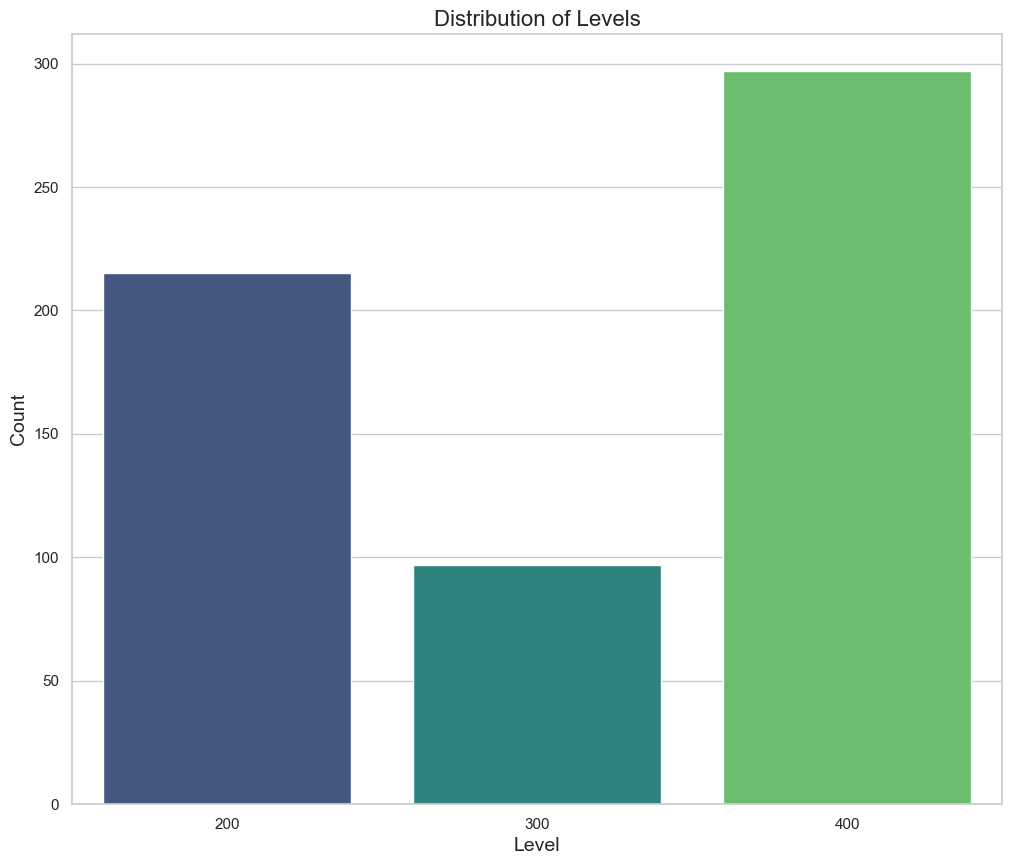

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the distribution of levels
sns.countplot(ax=ax, data=df, x='level', palette='viridis')
ax.set_title('Distribution of Levels', fontsize=16)
ax.set_xlabel('Level', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=0)

# Show the plots
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\204390171.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_courses.values, y=top_courses.index, palette='viridis')


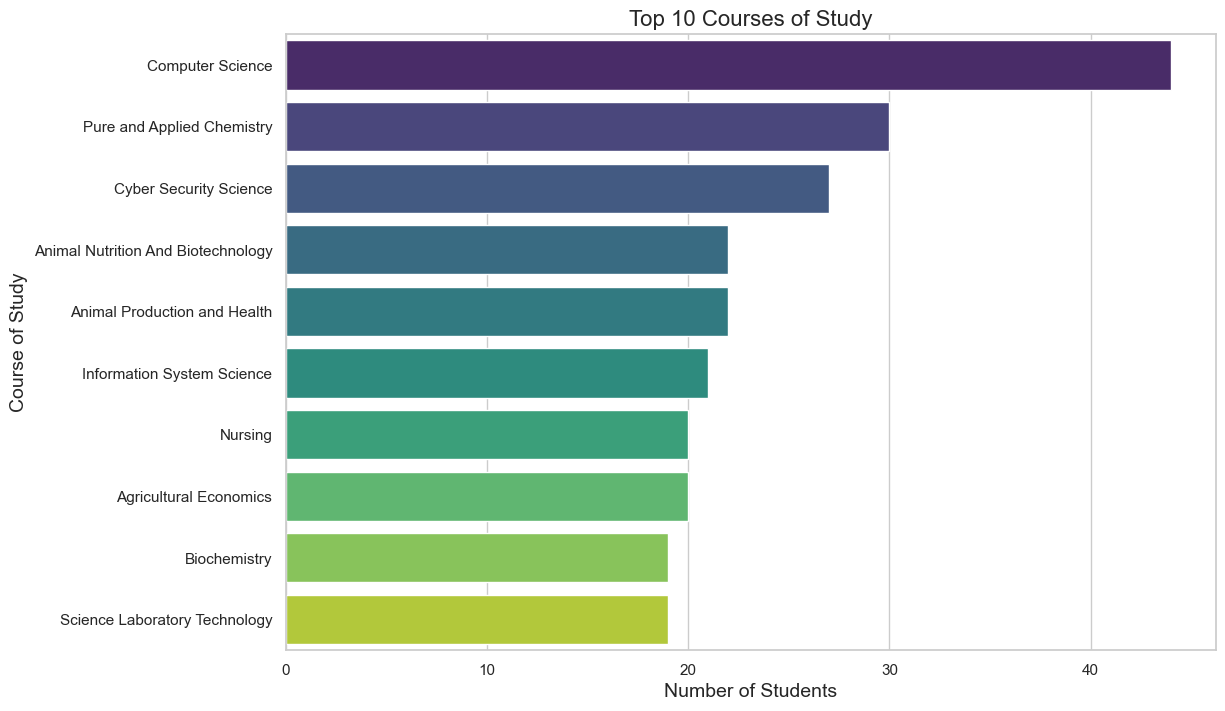

In [34]:
import seaborn as sns

import matplotlib.pyplot as plt

# Get the top 10 courses of study
top_courses = df['course_of_study'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_courses.values, y=top_courses.index, palette='viridis')
plt.title('Top 10 Courses of Study', fontsize=16)
plt.xlabel('Number of Students', fontsize=14)
plt.ylabel('Course of Study', fontsize=14)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


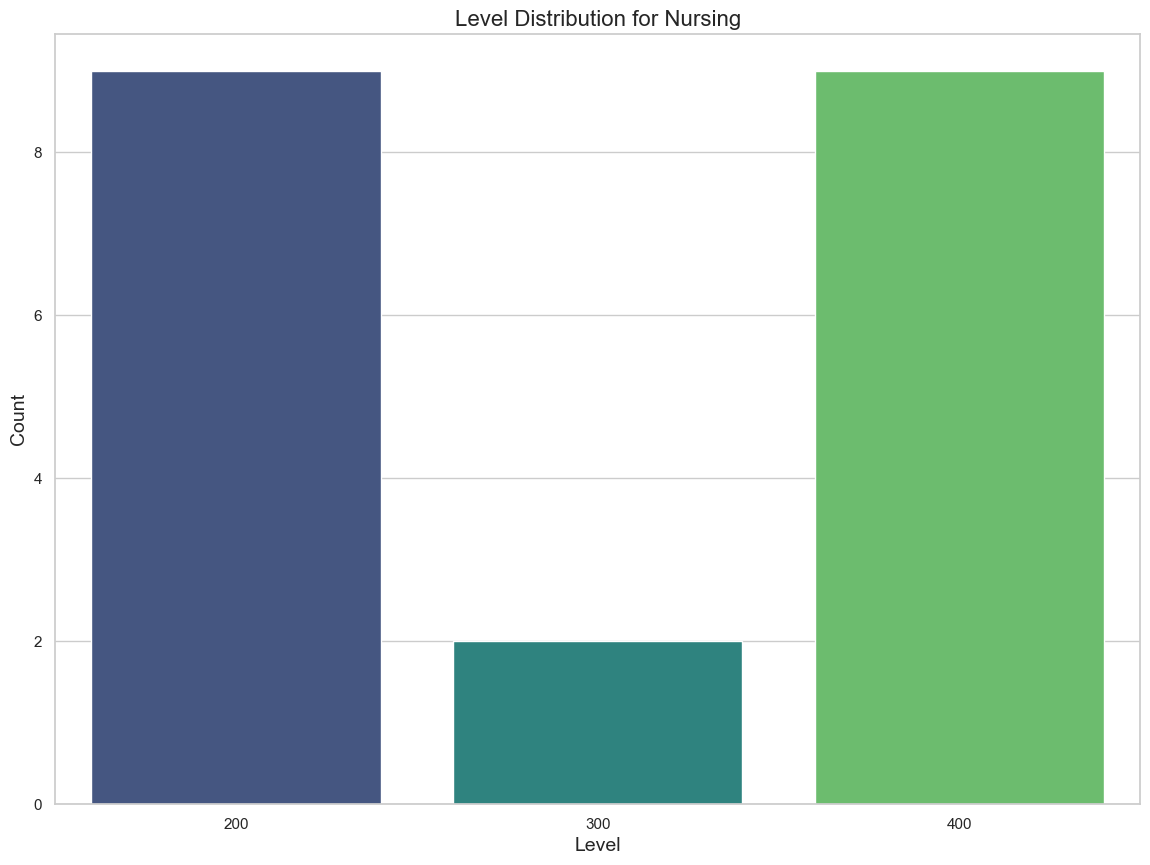

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


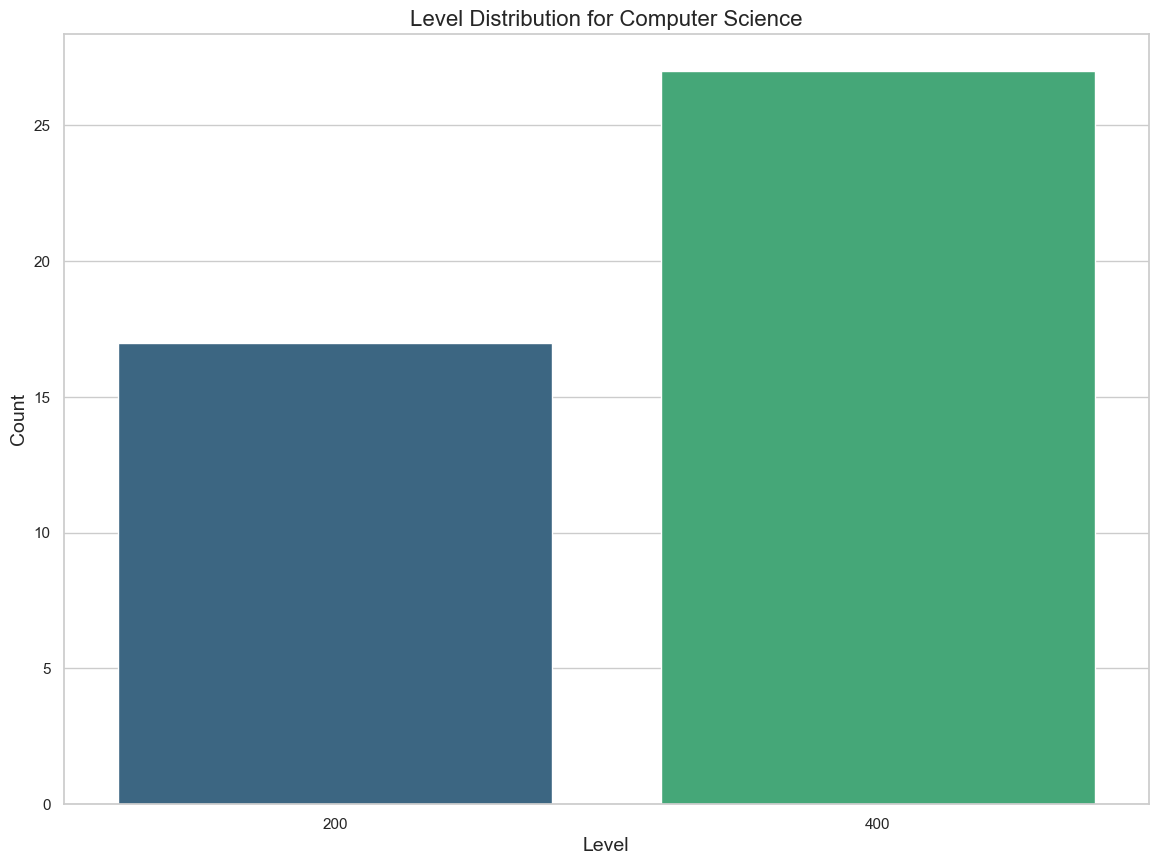

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


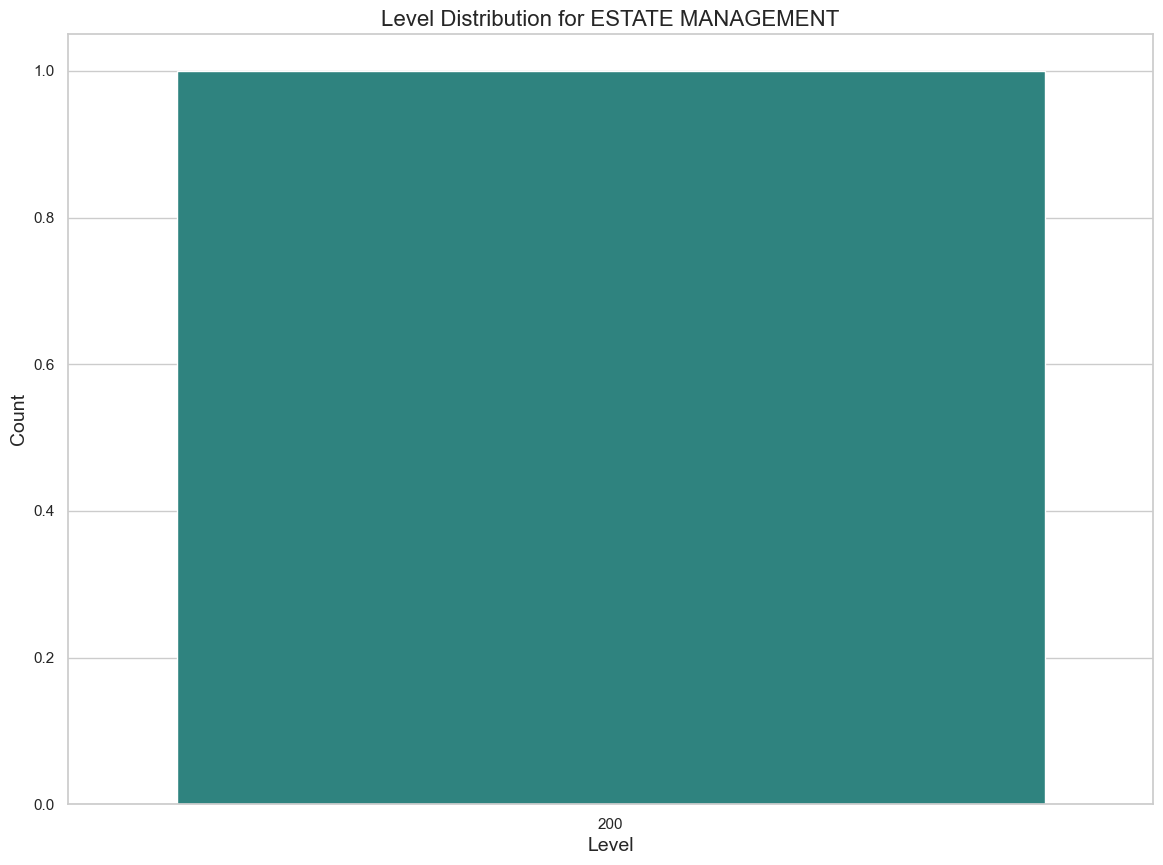

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


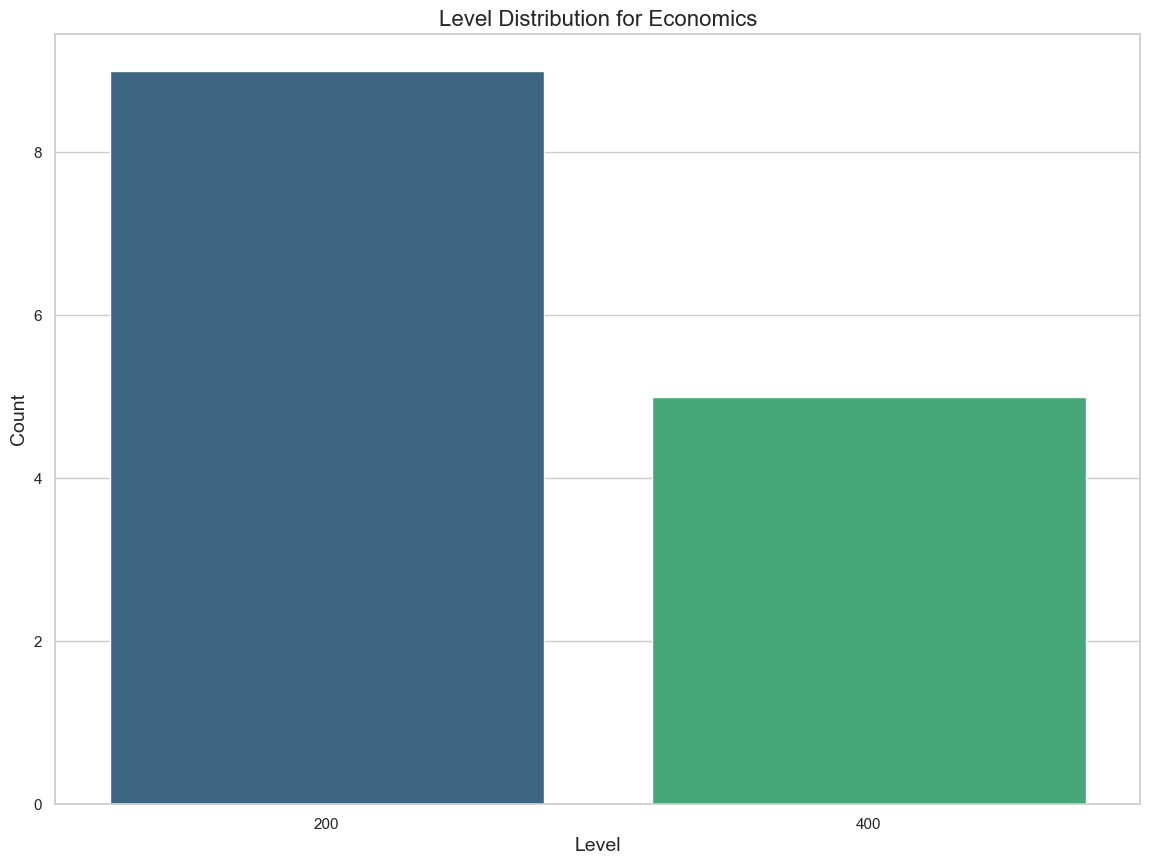

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


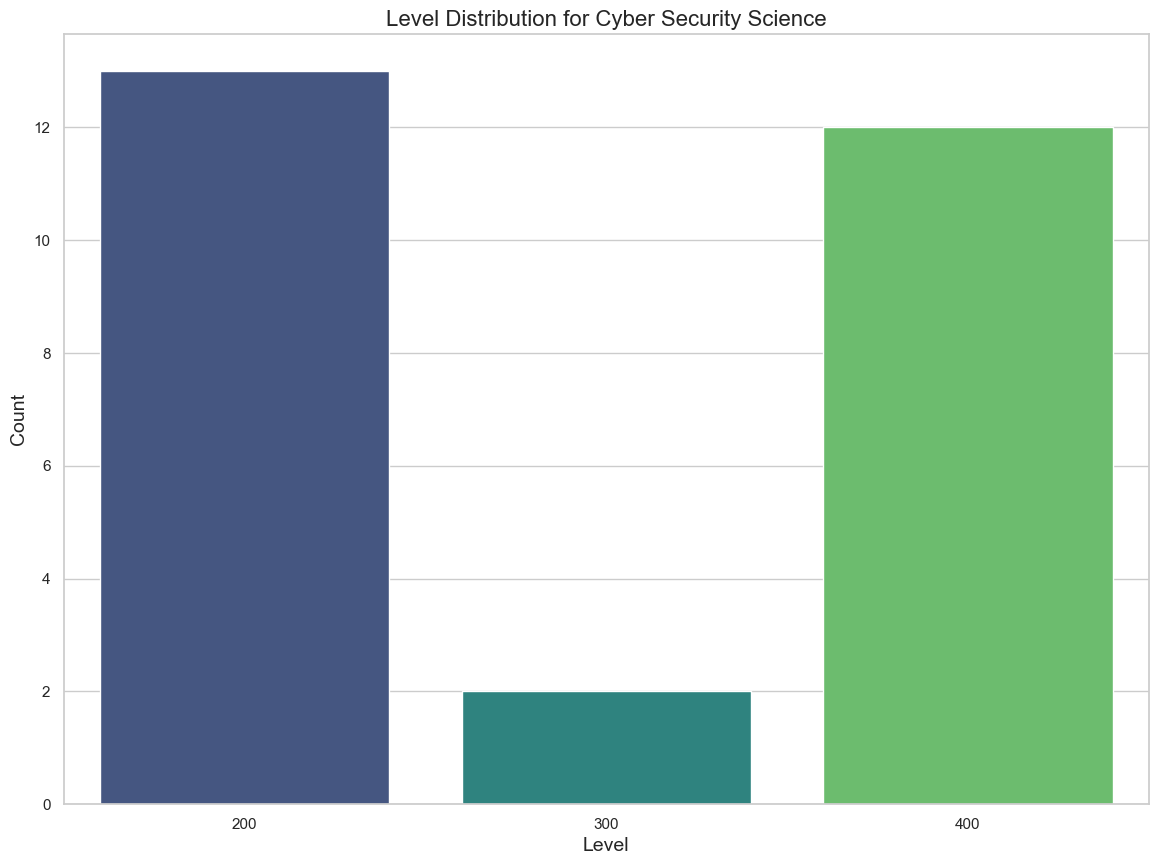

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


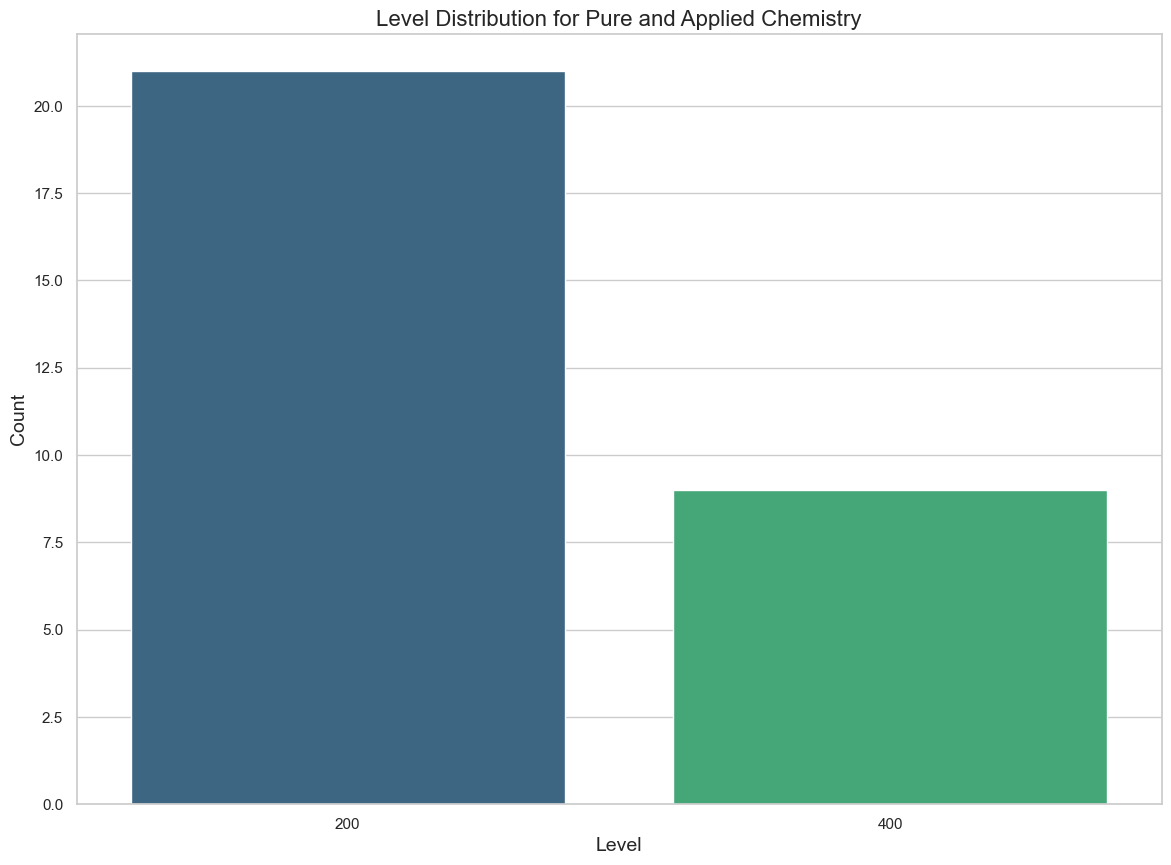

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


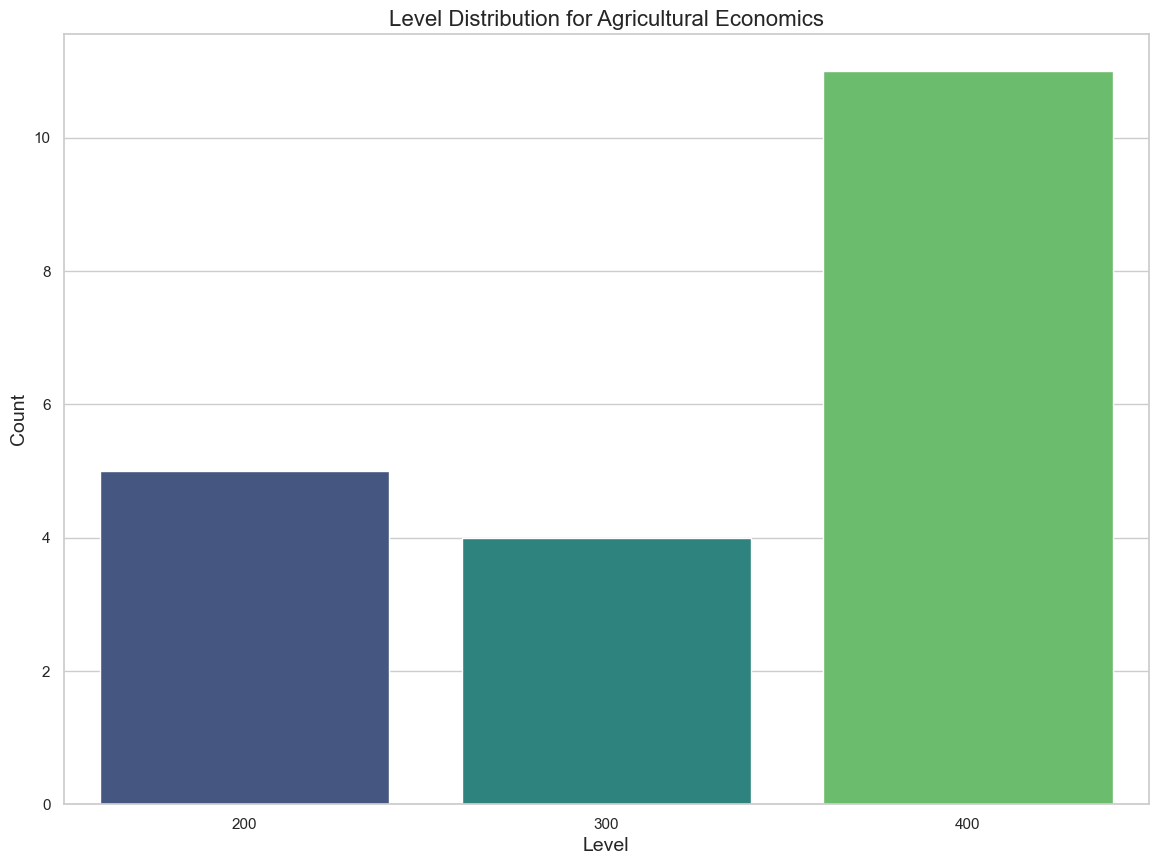

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


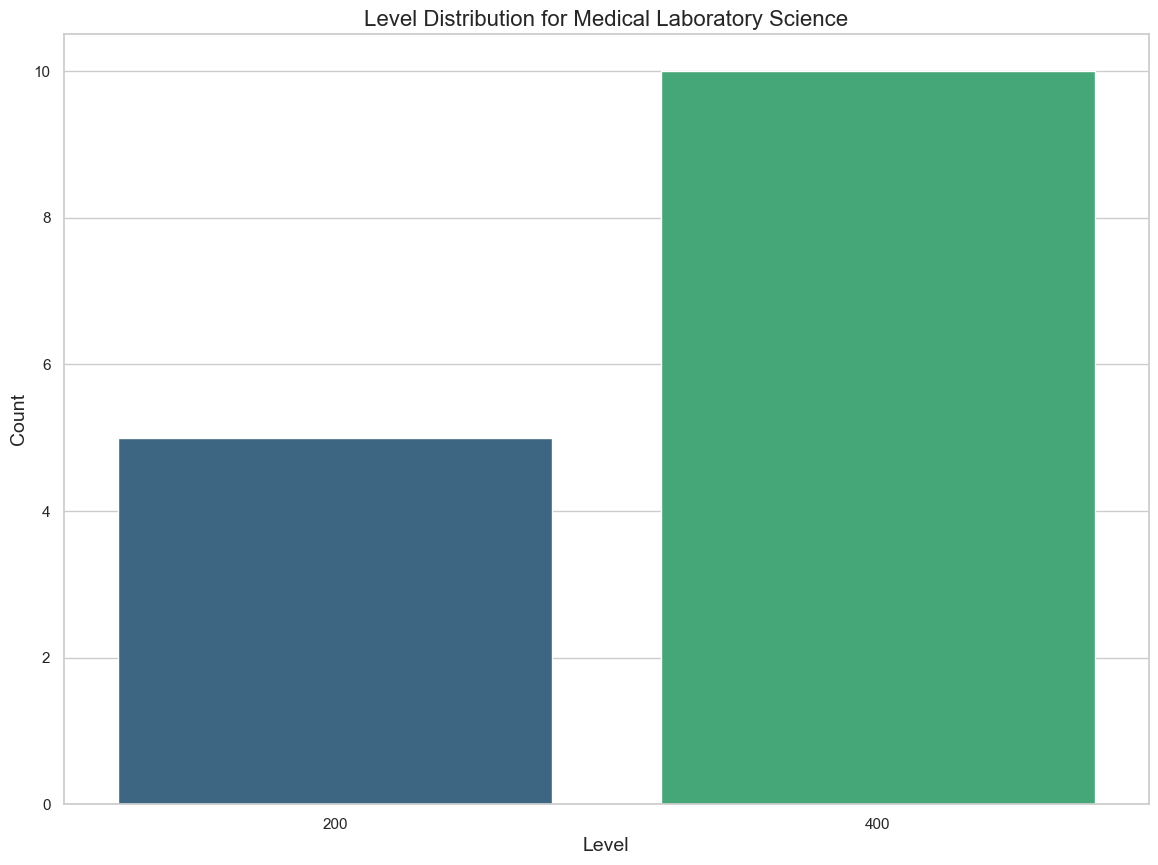

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


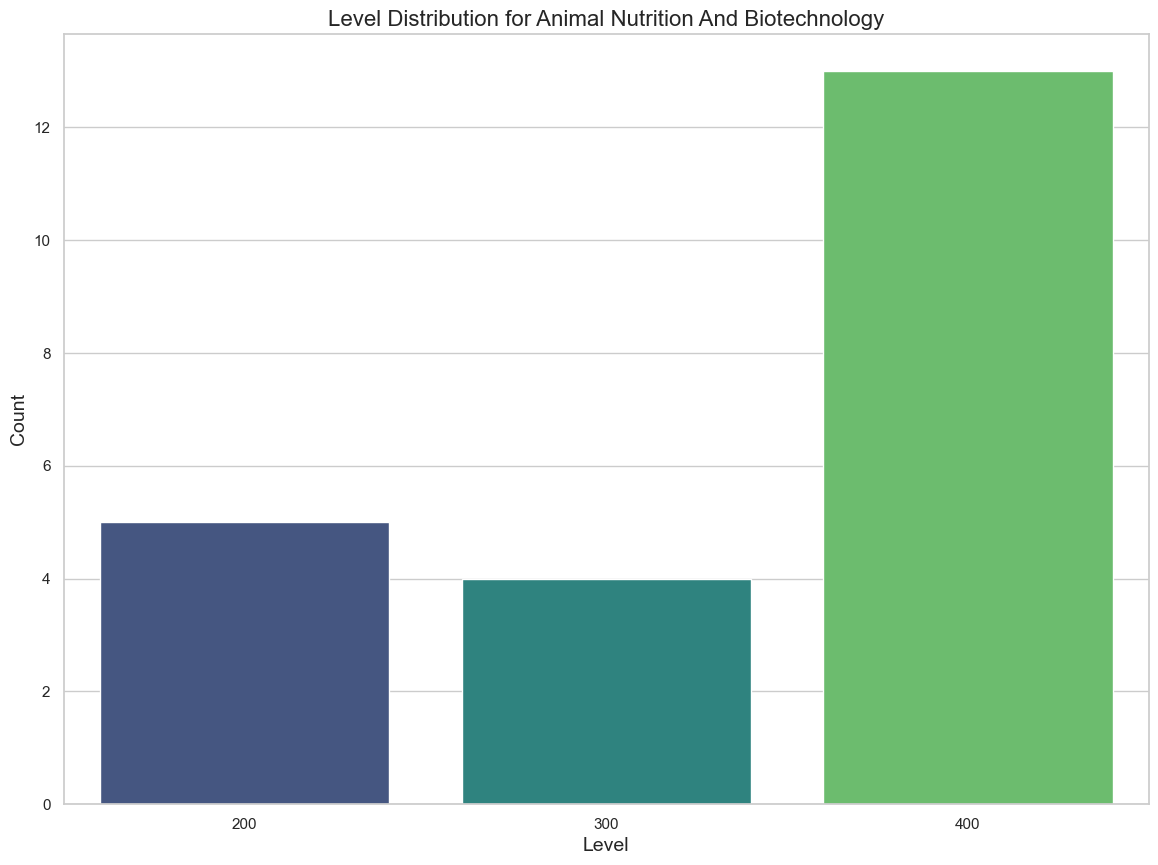

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


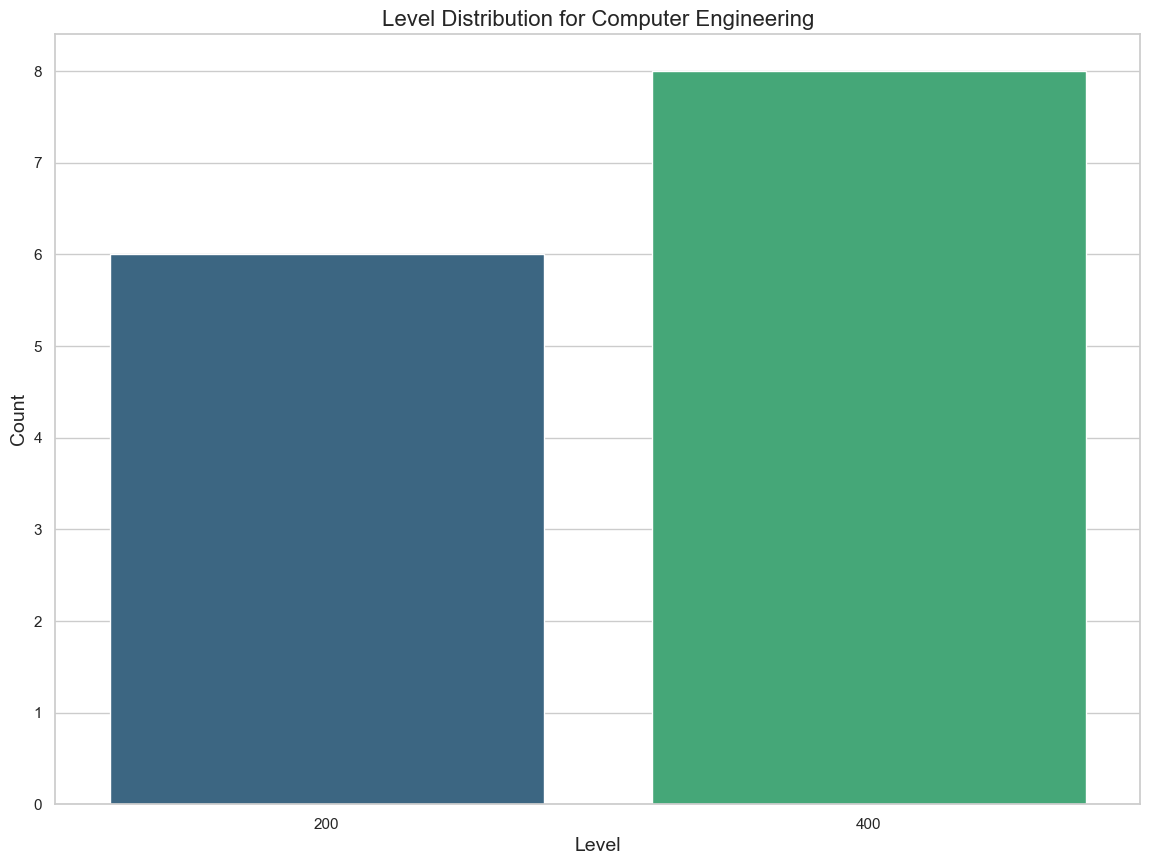

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


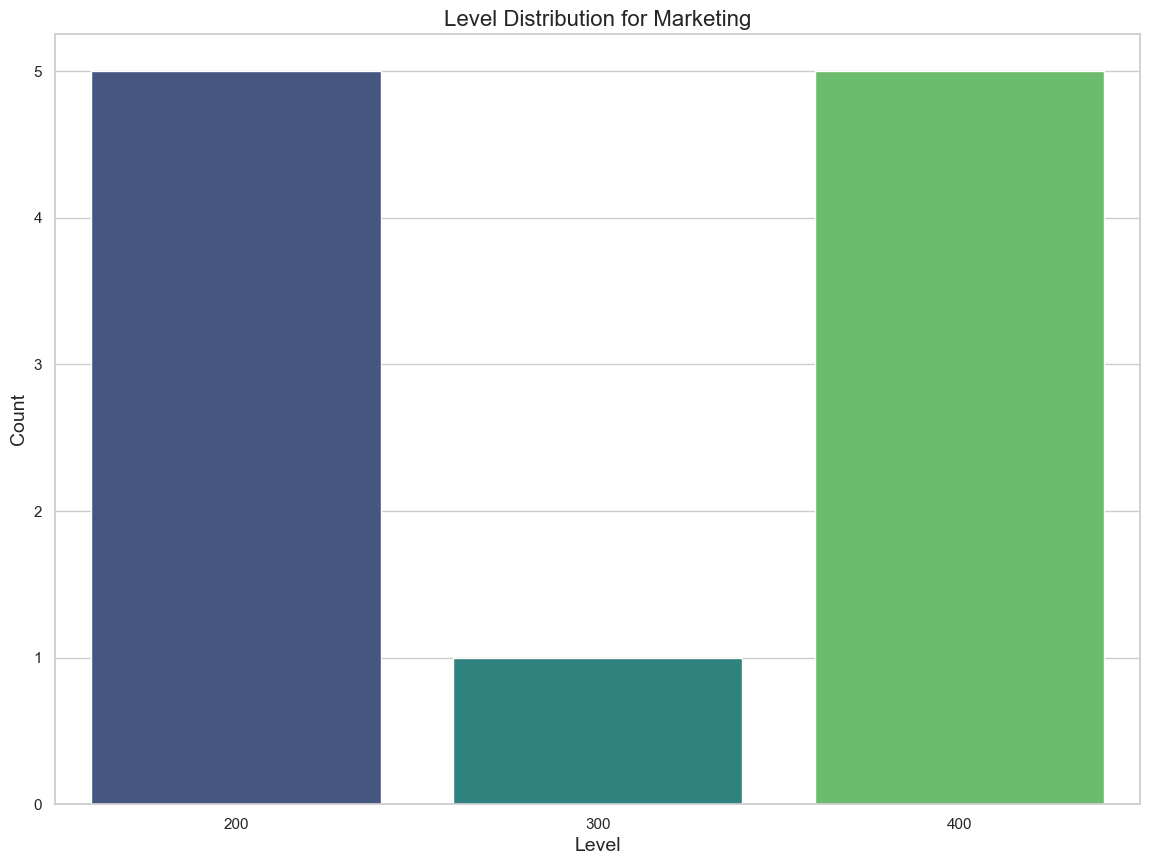

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


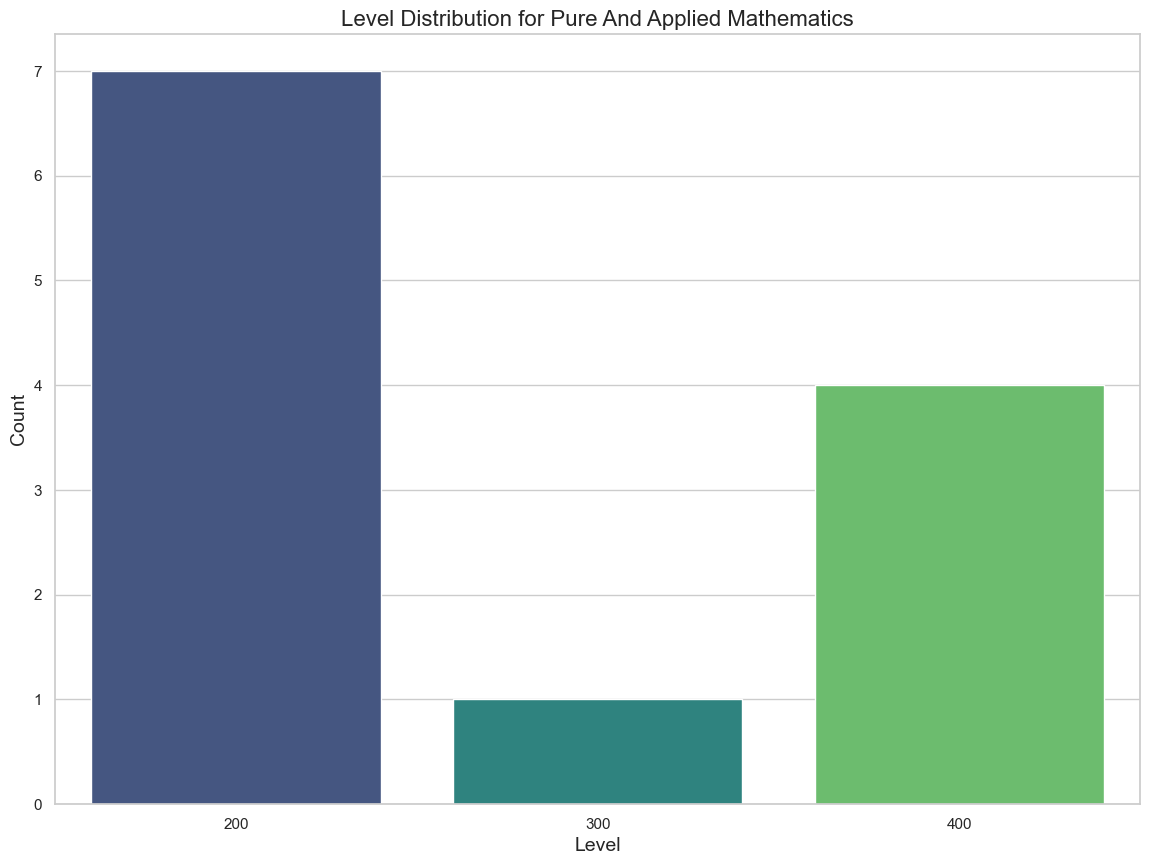

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


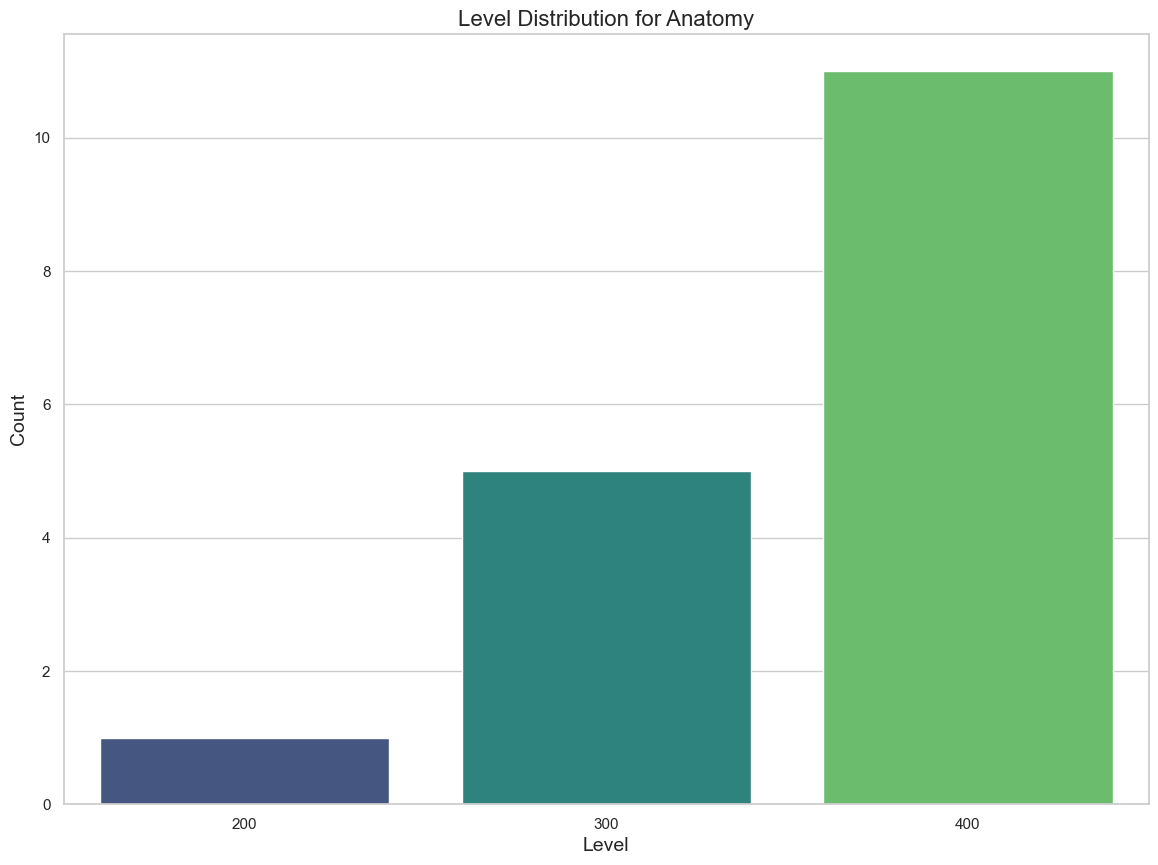

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


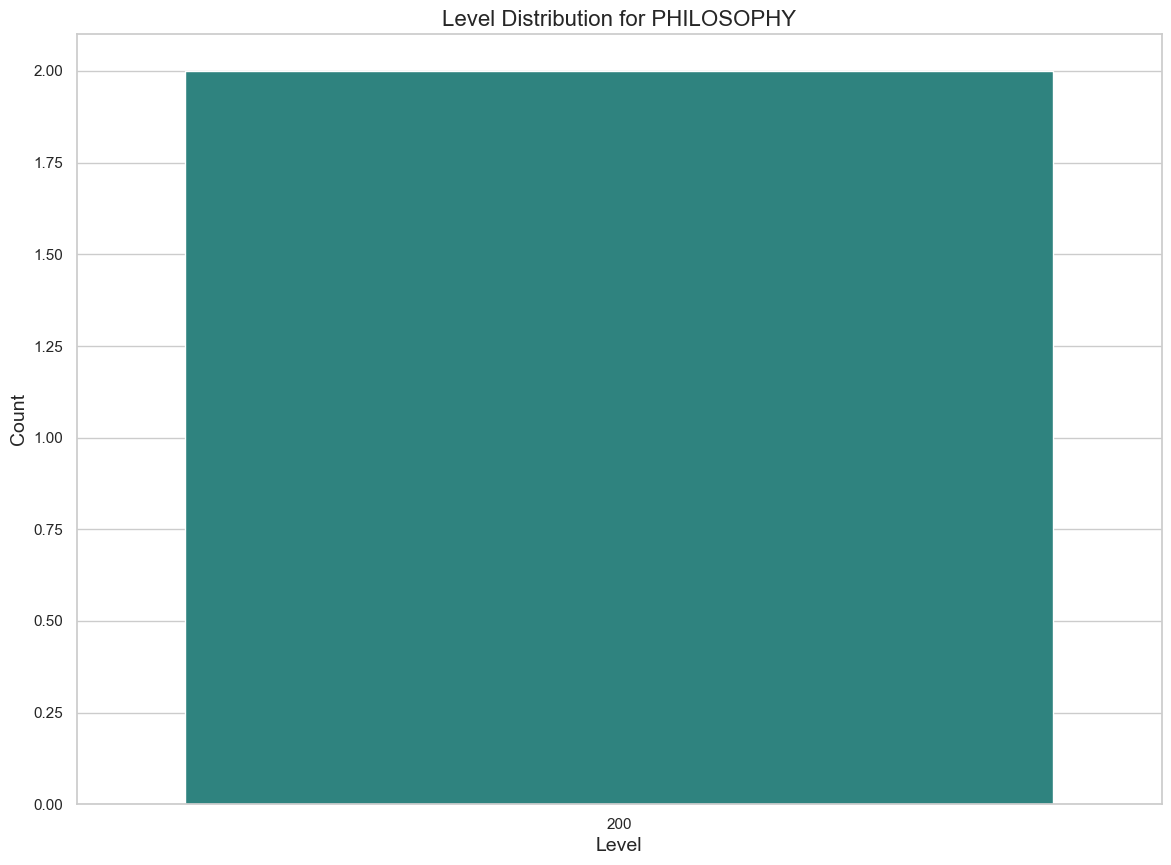

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


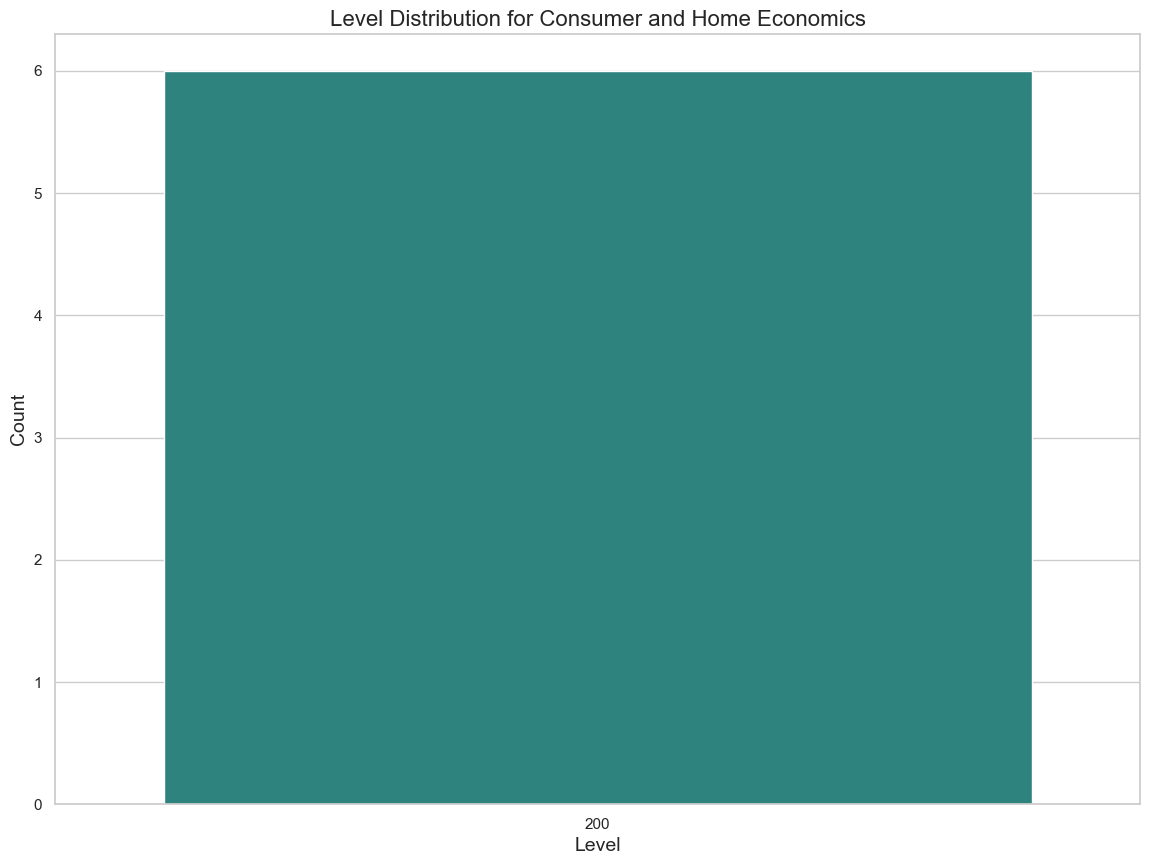

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


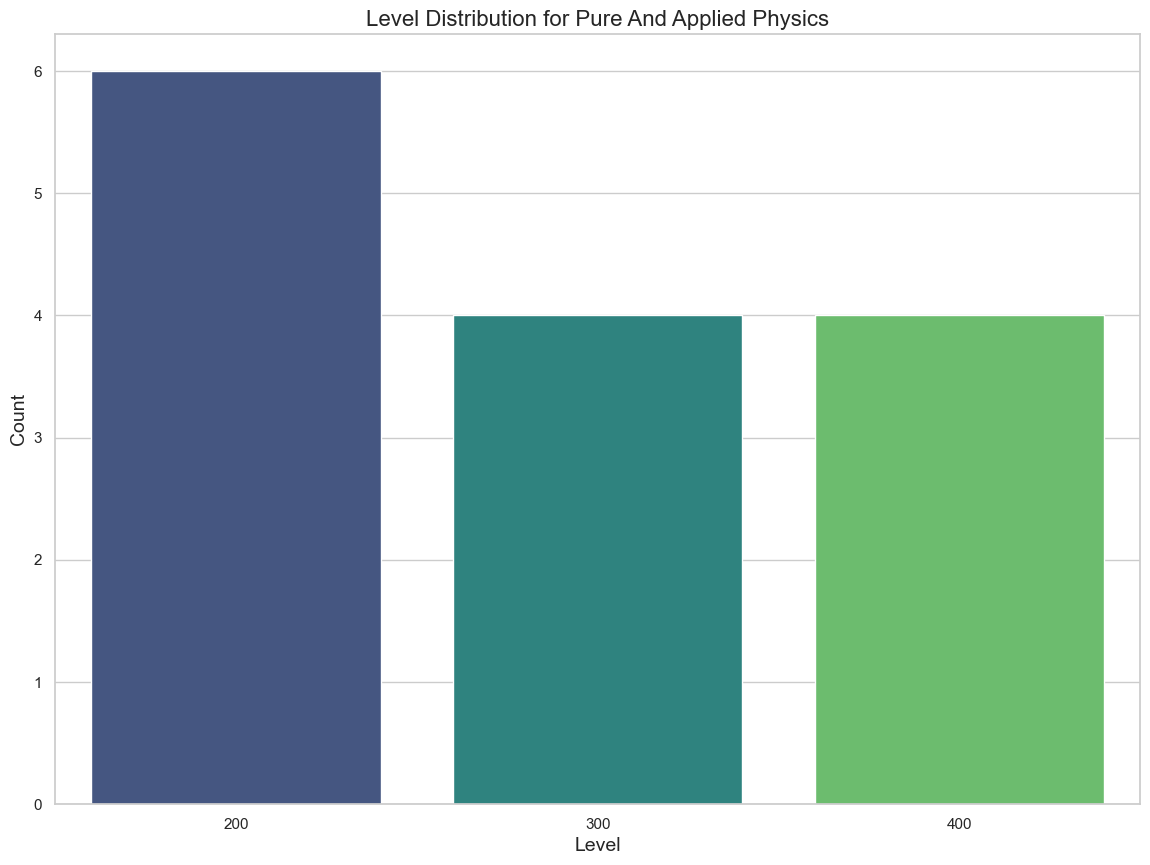

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


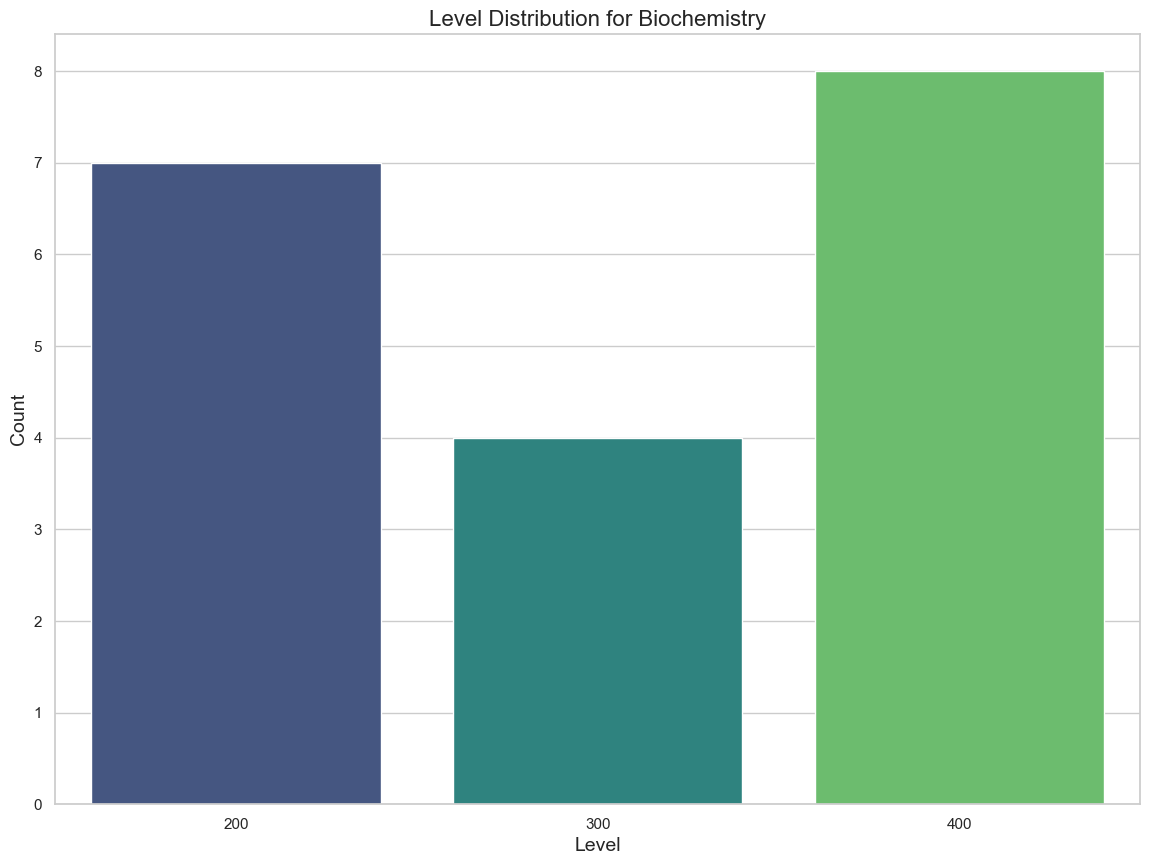

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


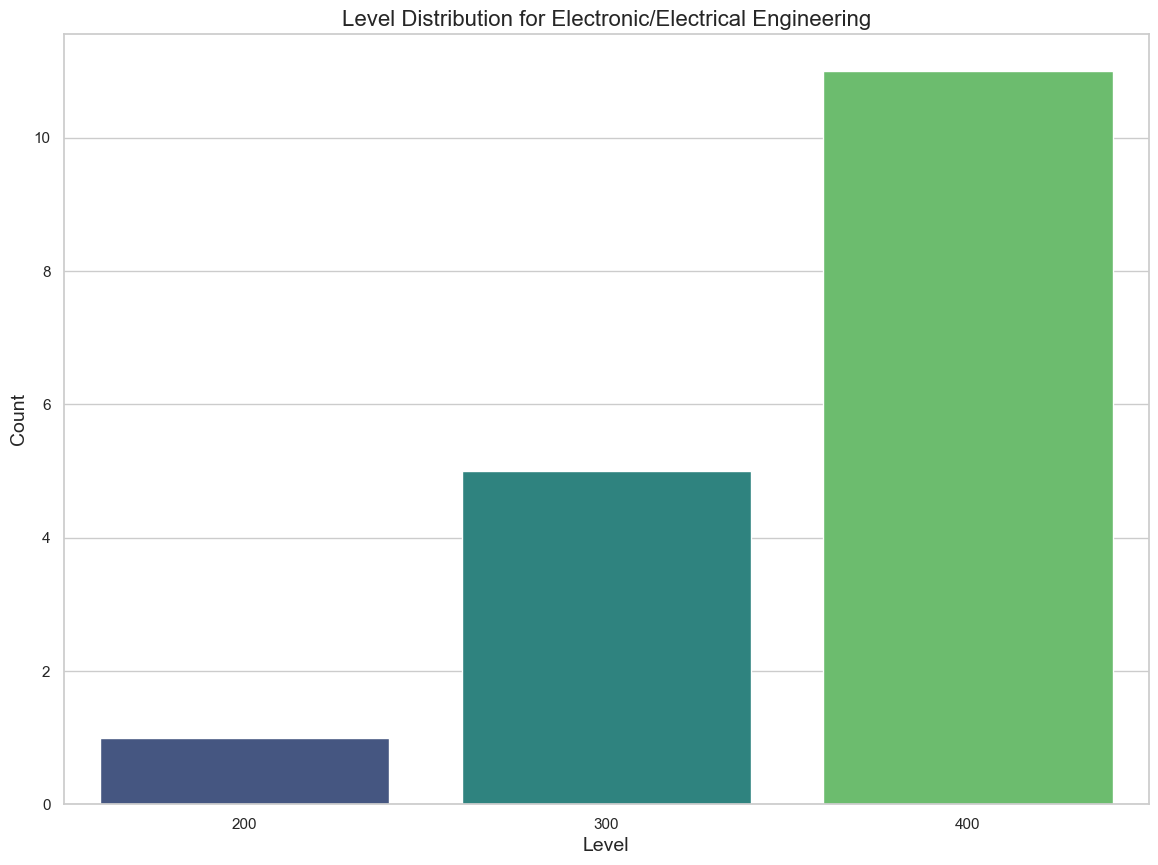

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


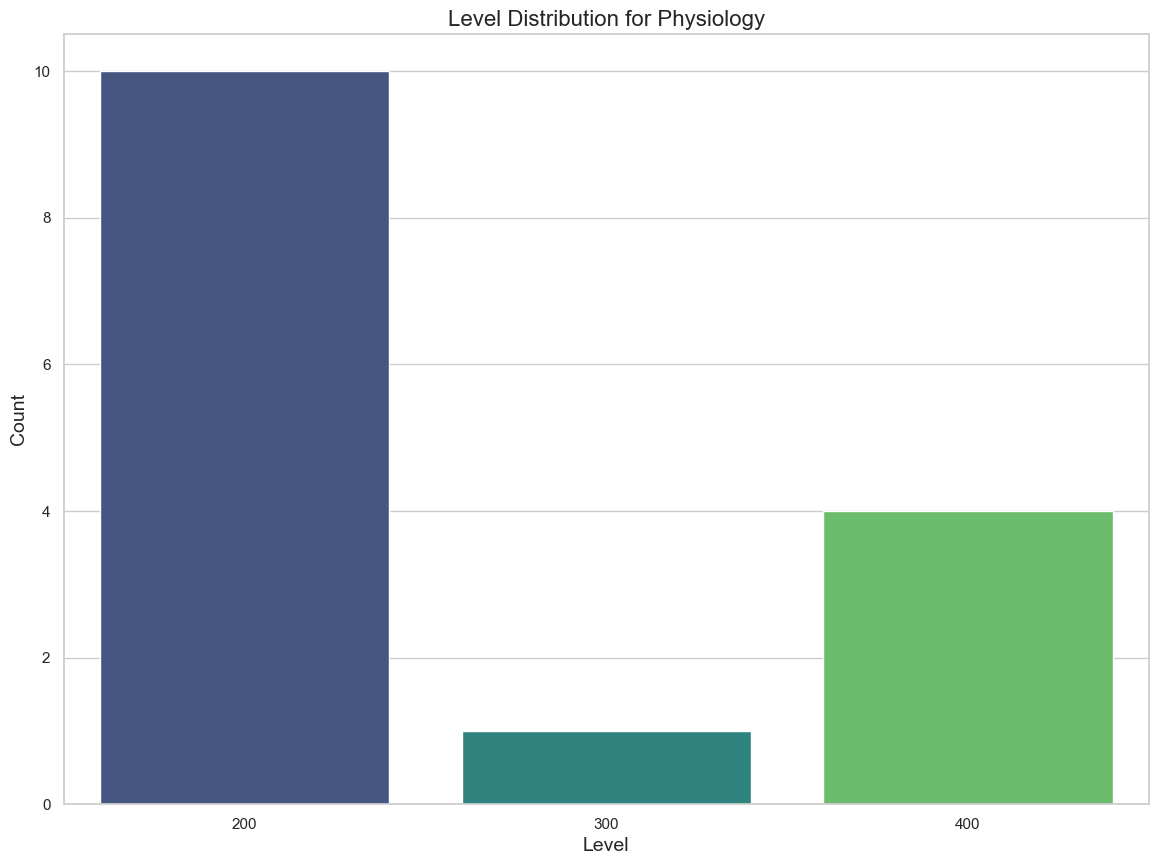

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


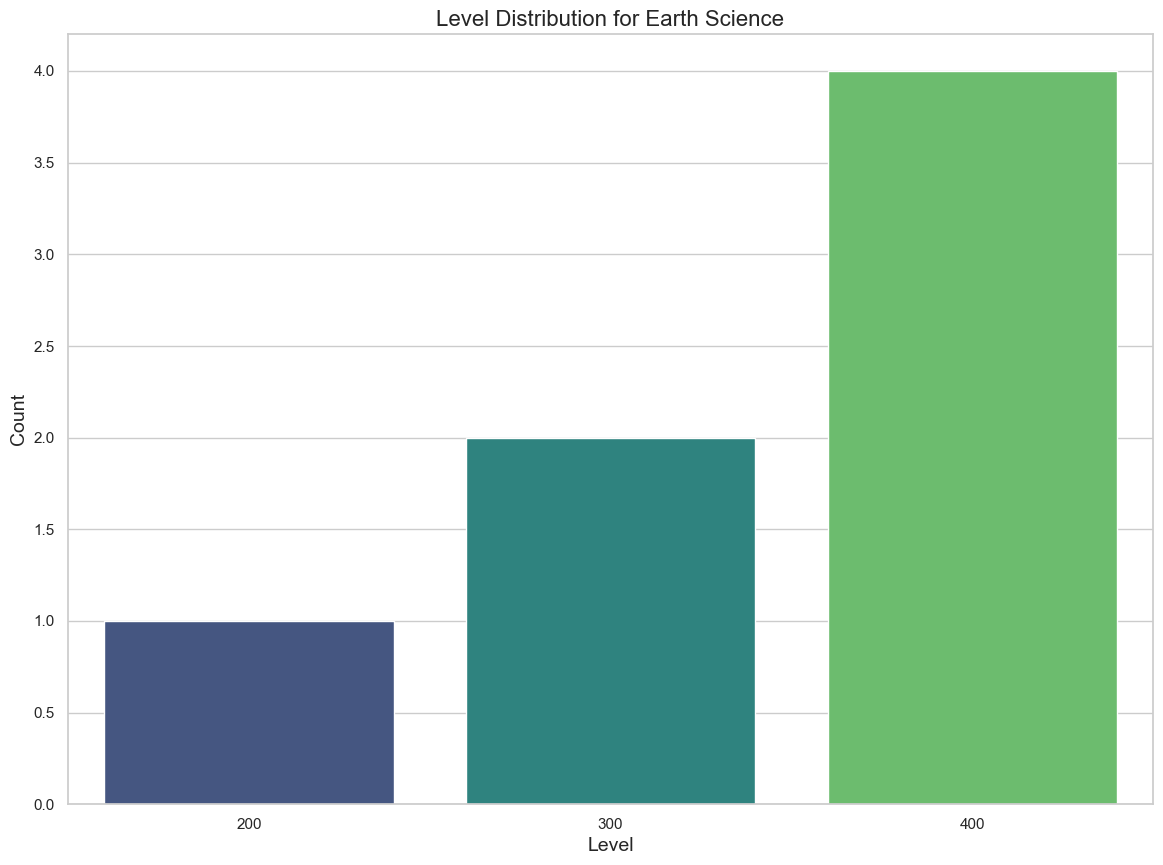

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


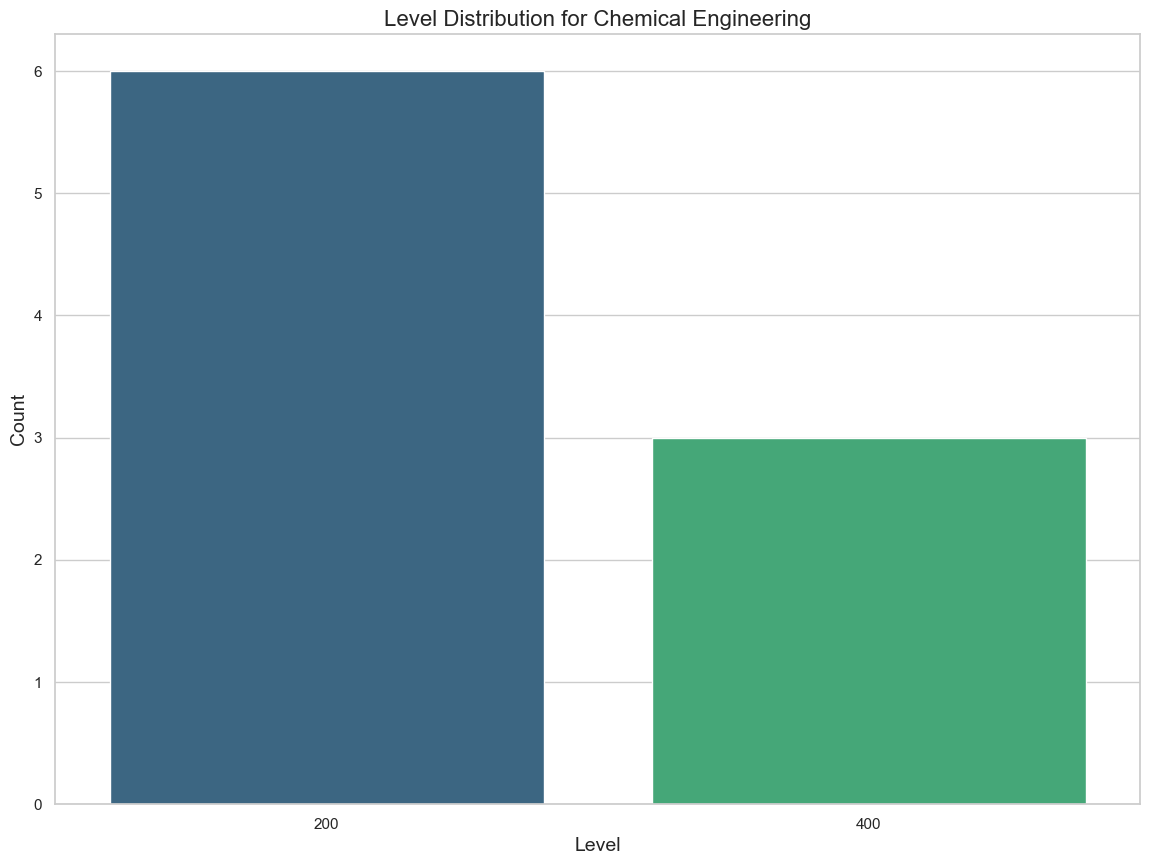

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


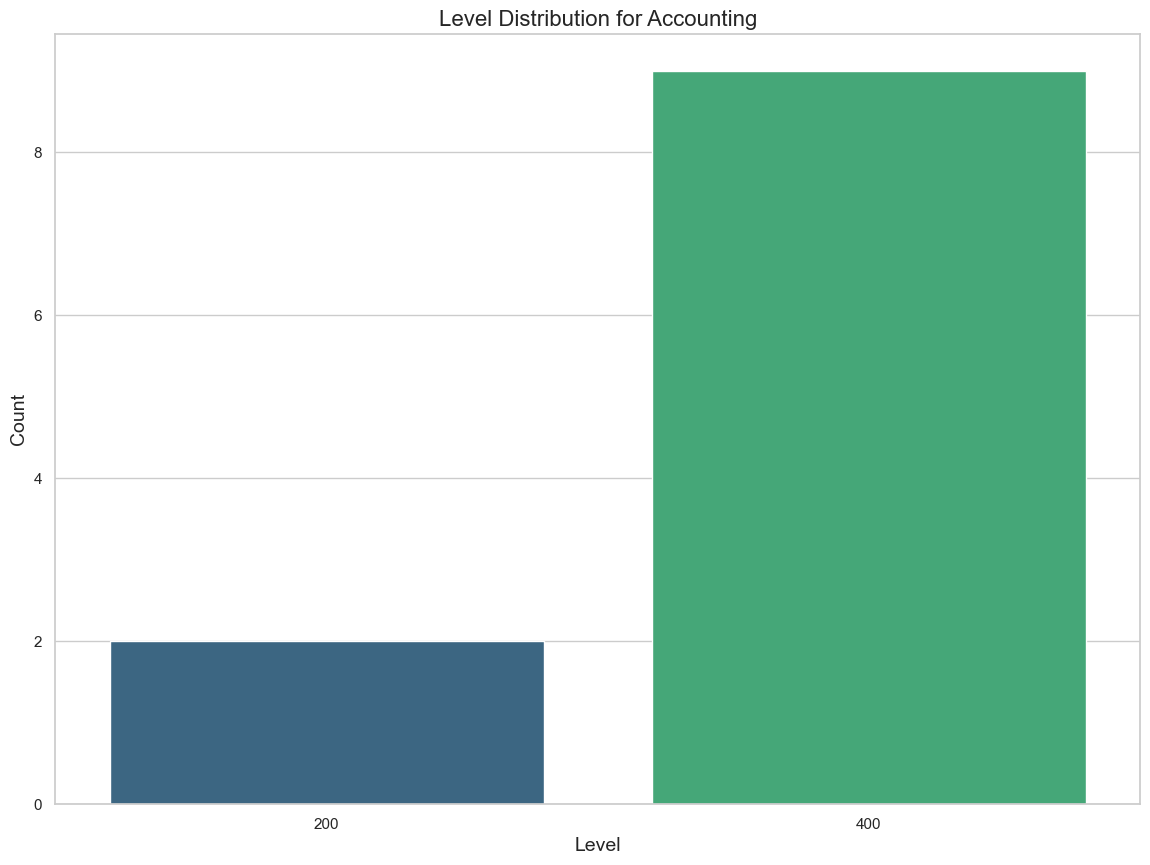

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


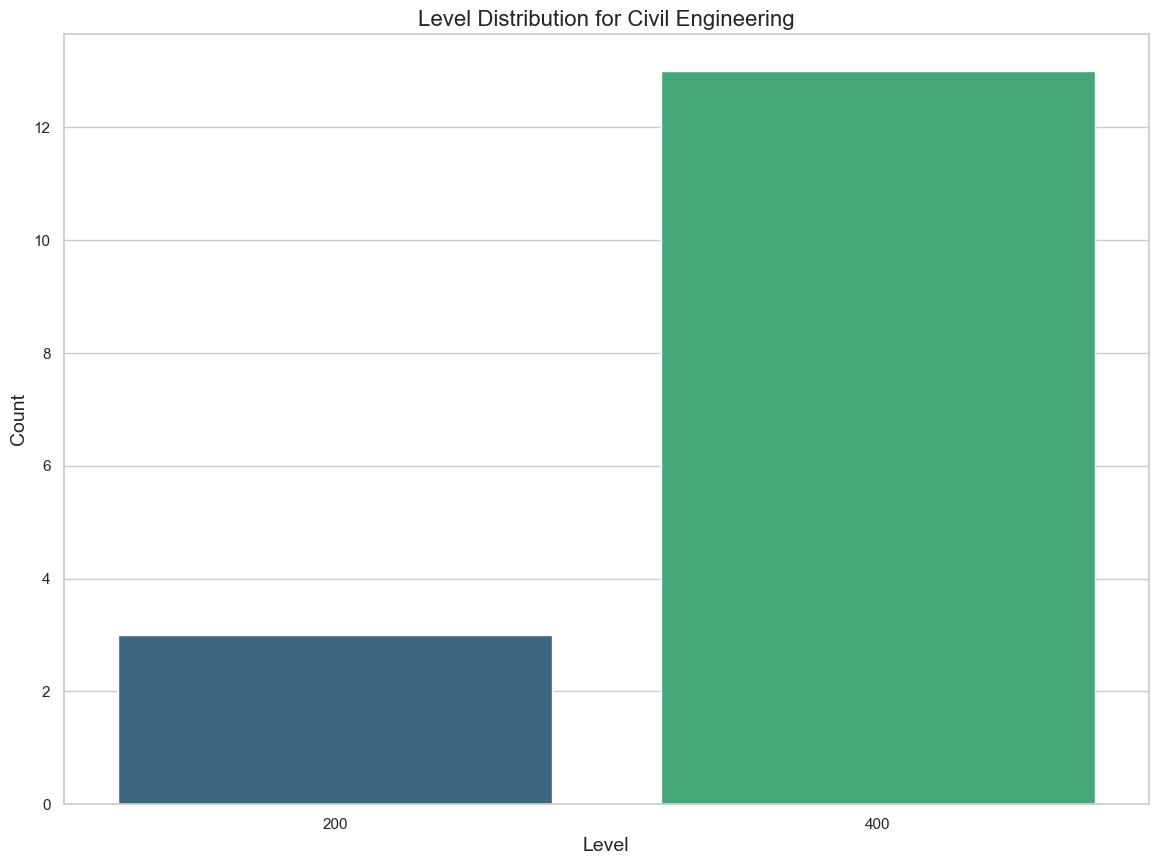

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


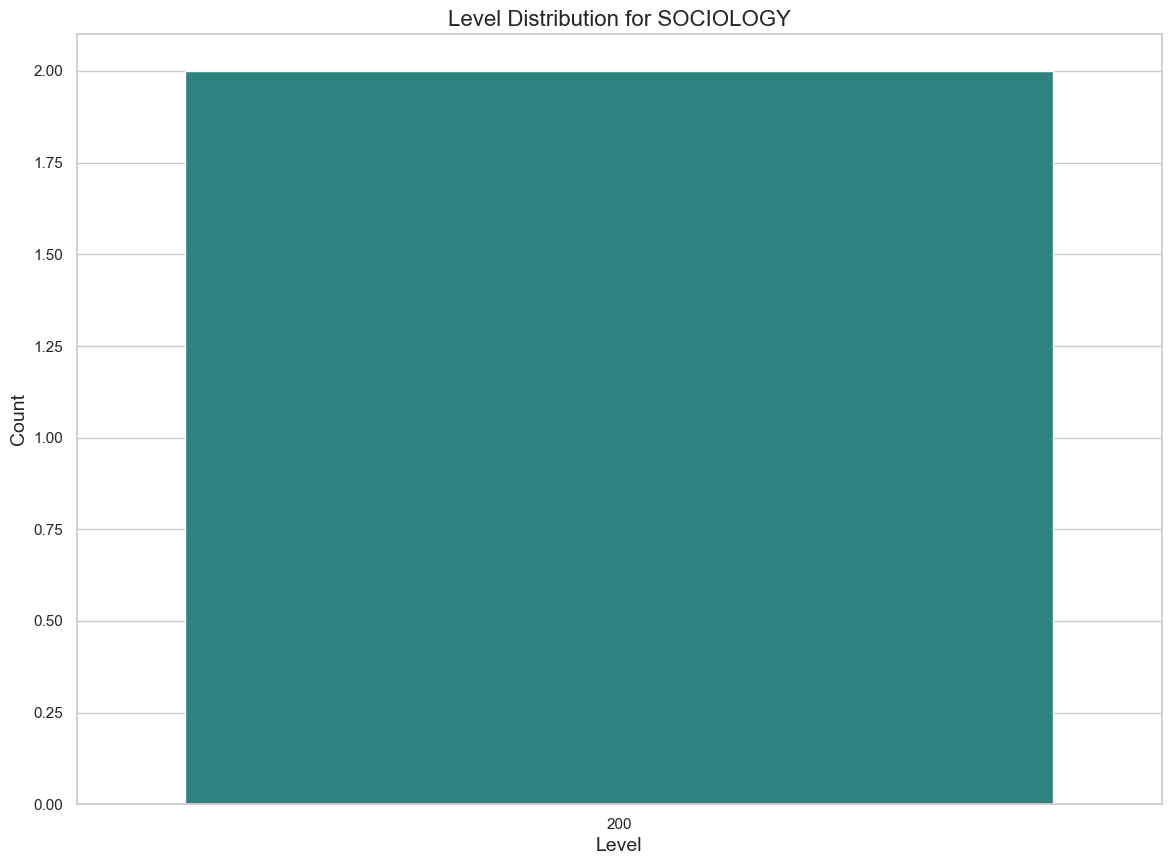

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


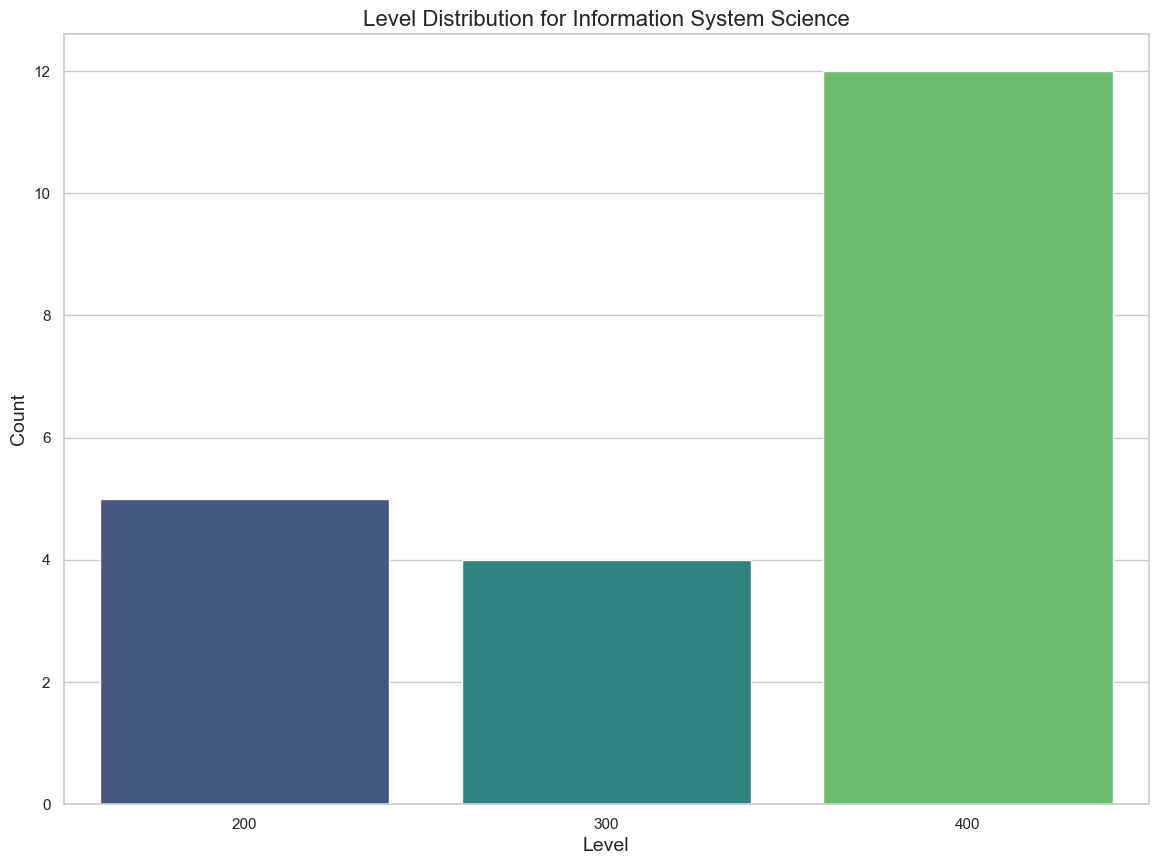

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


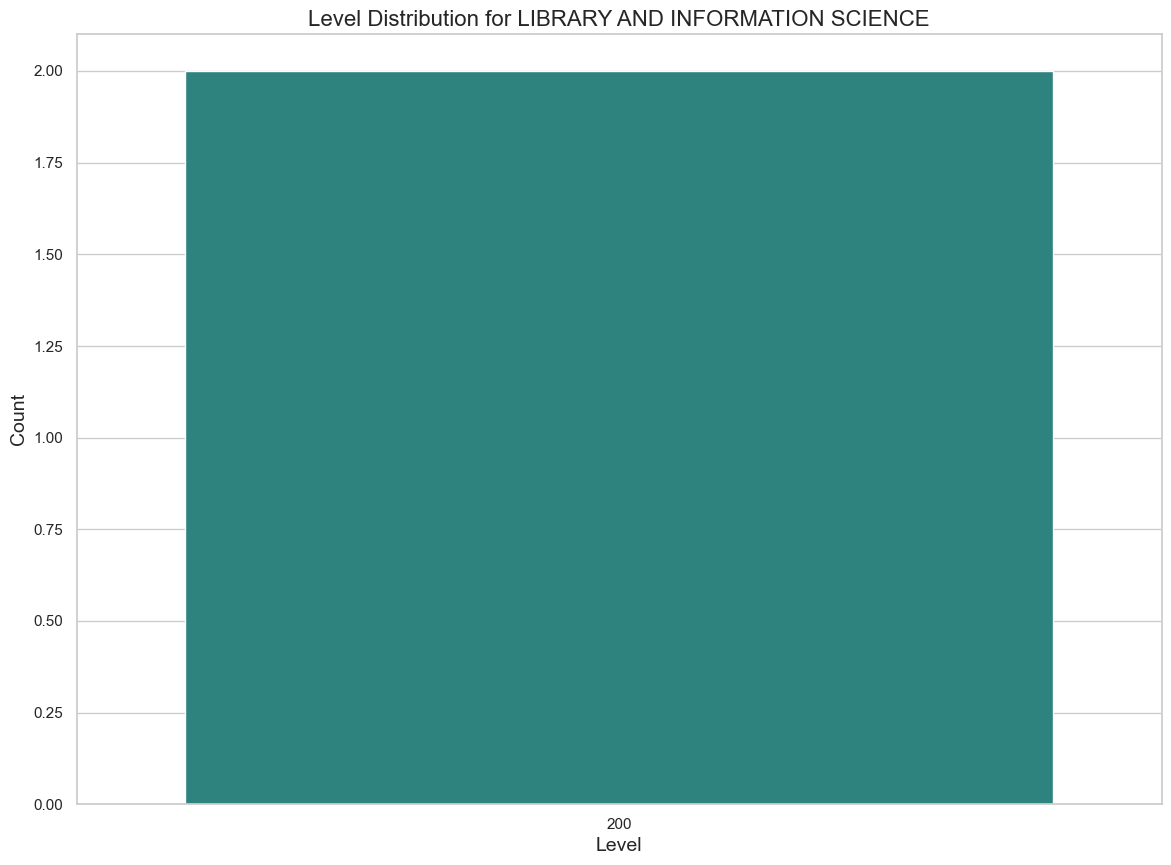

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


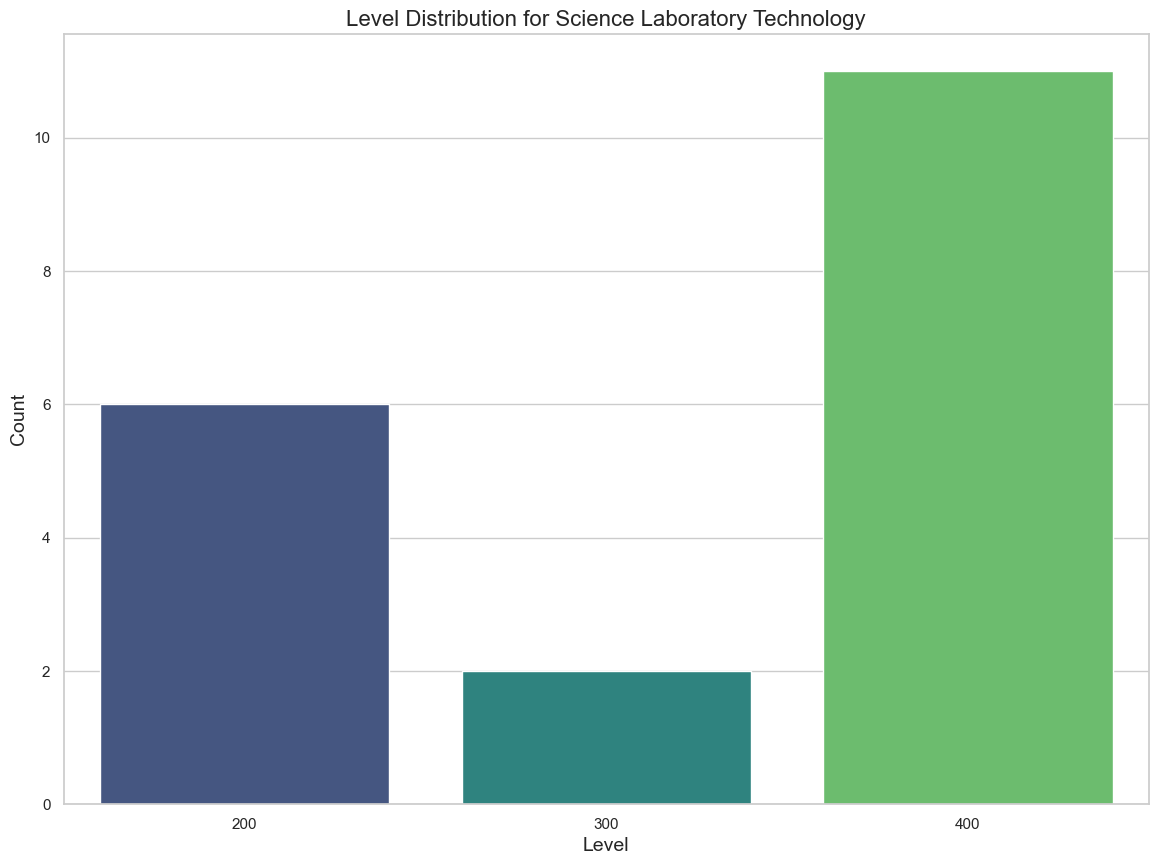

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


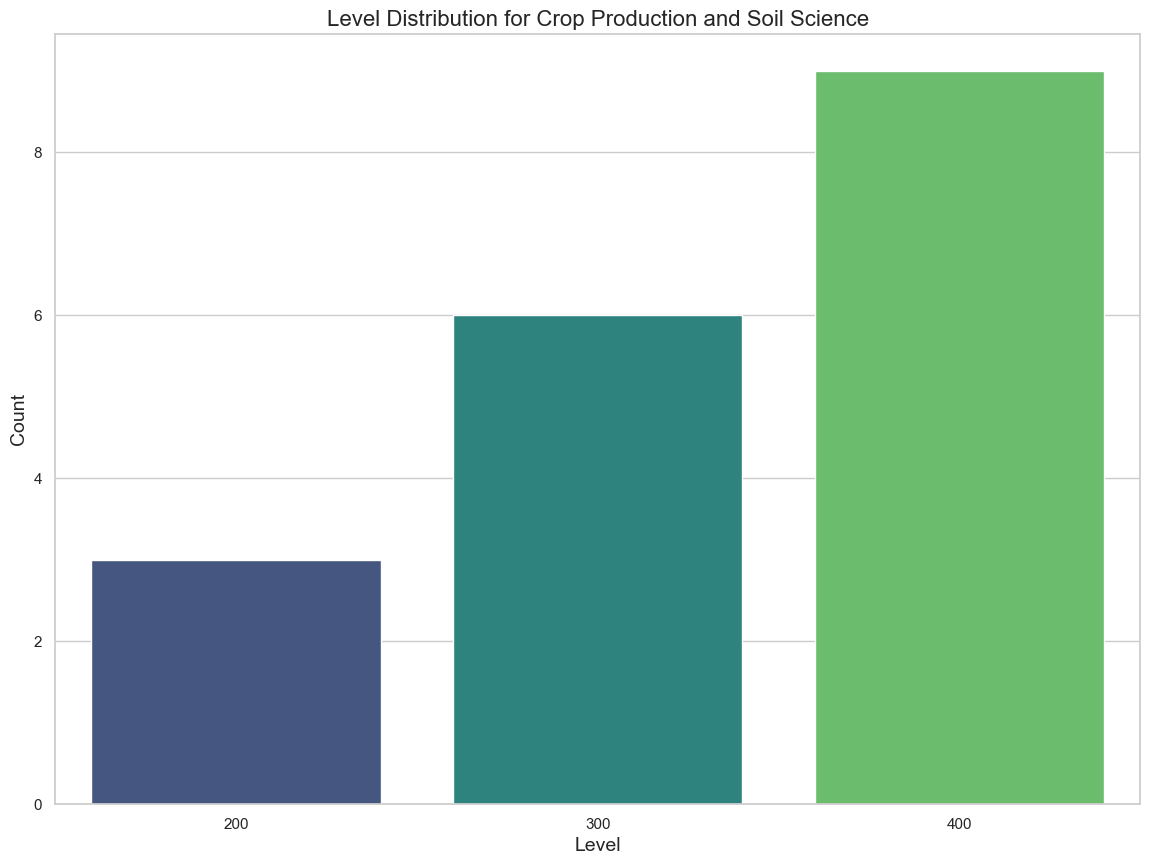

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


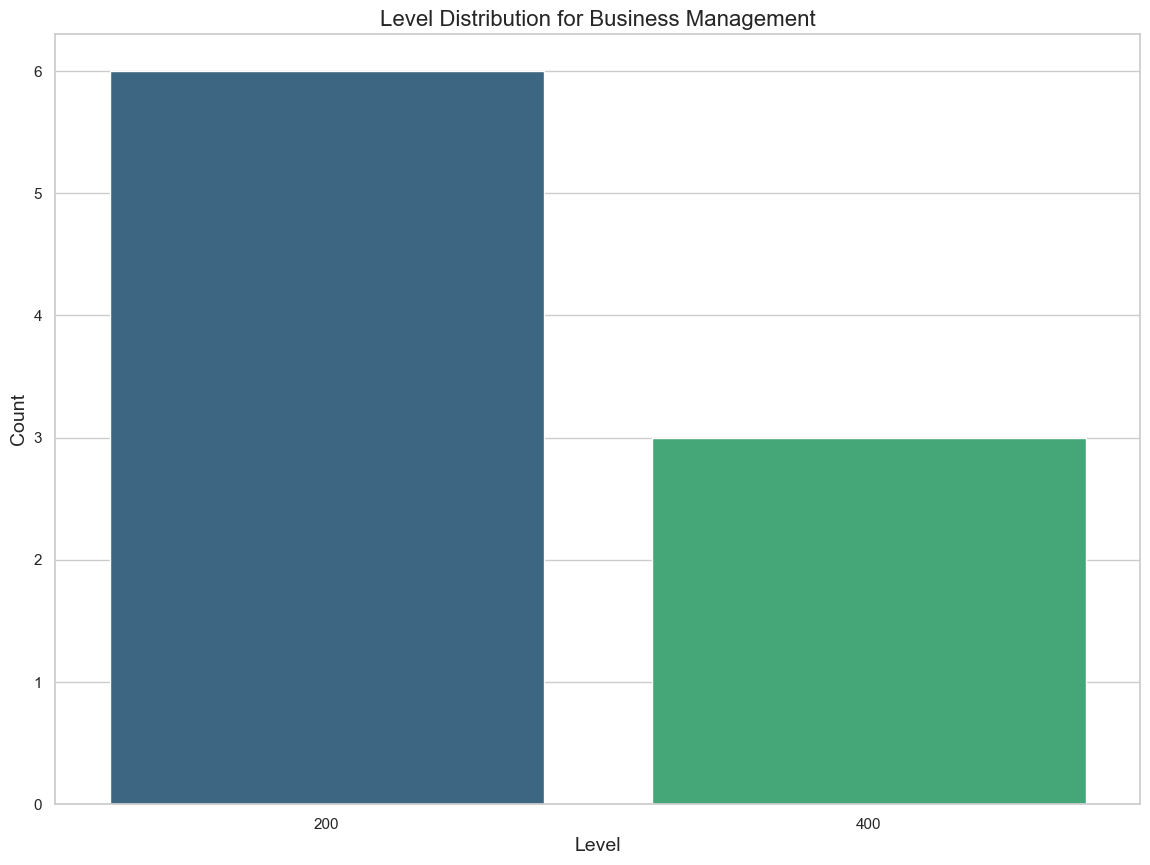

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


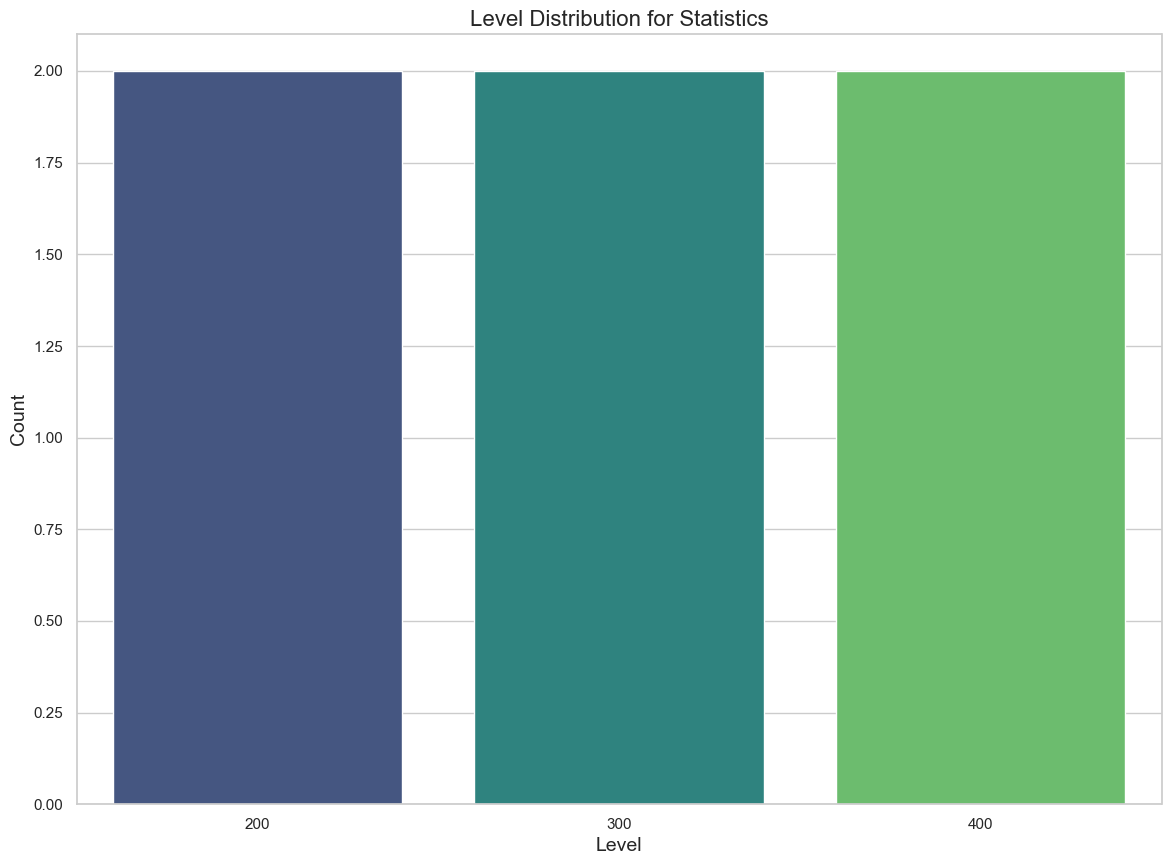

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


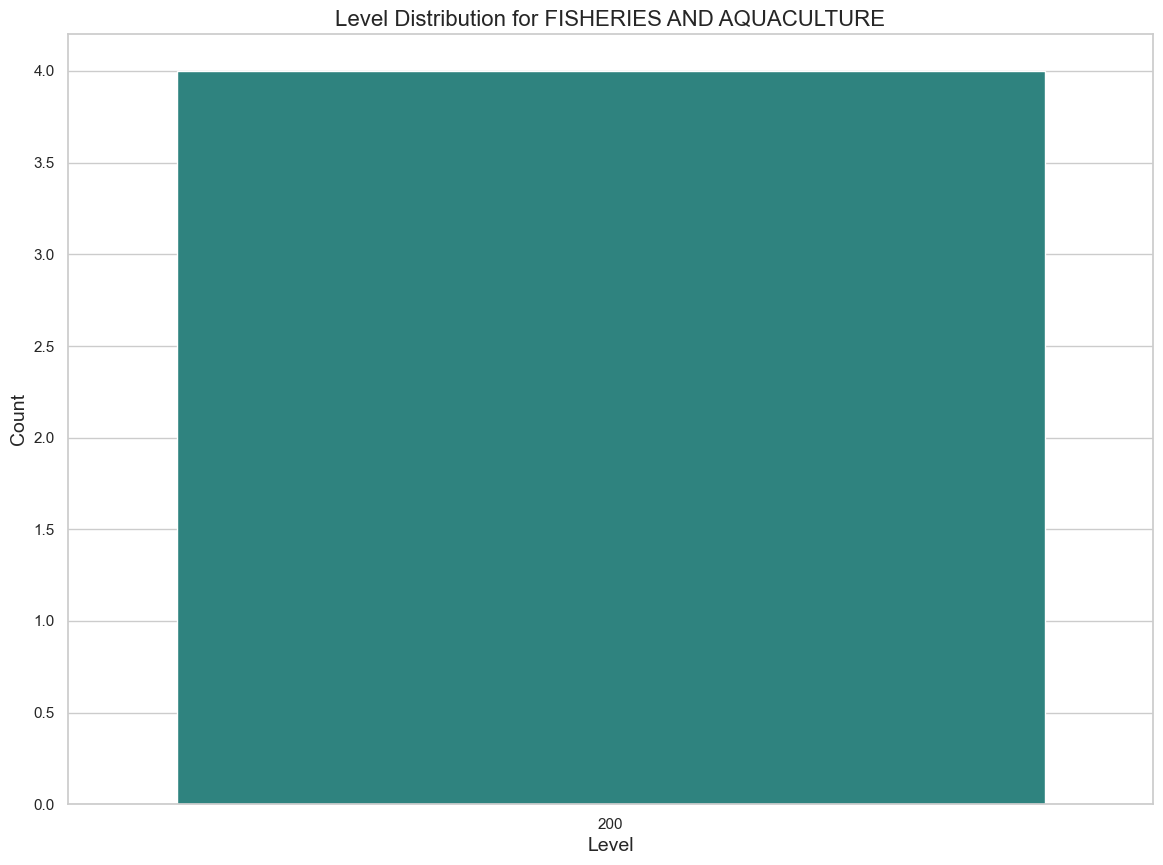

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


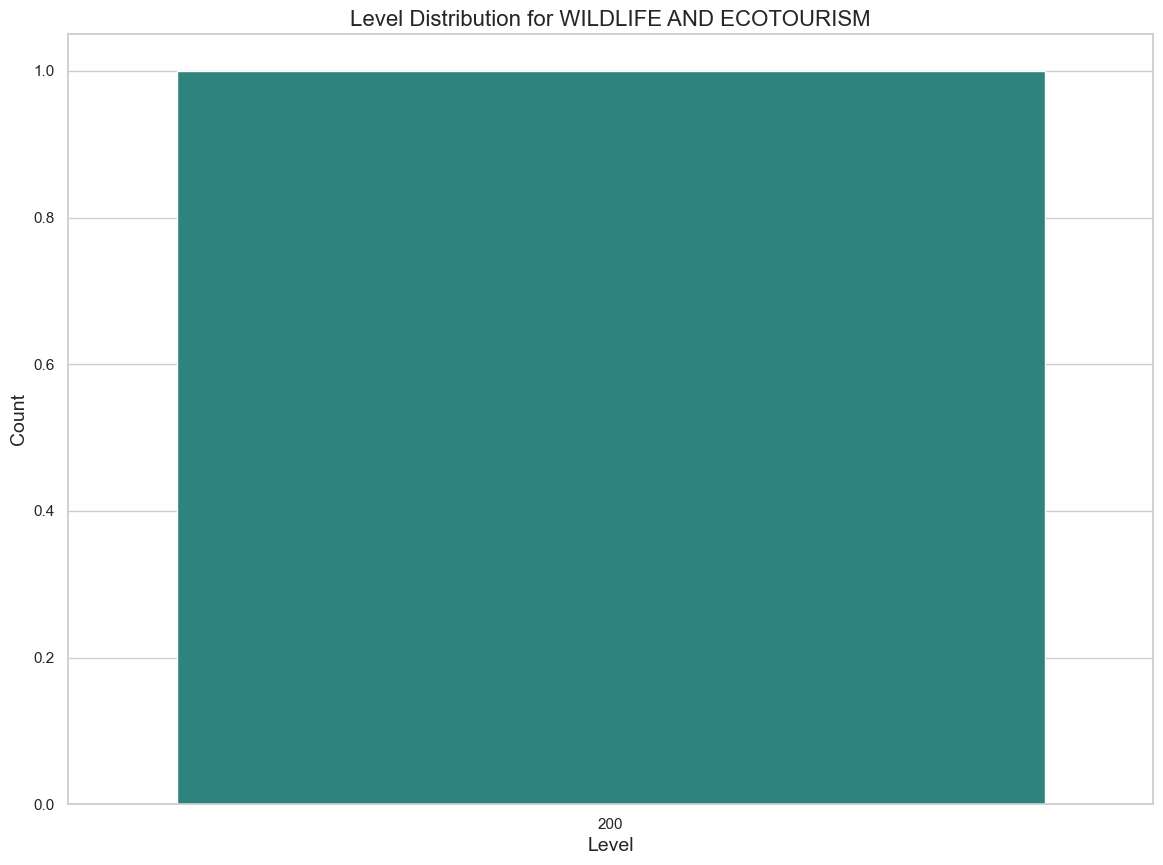

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


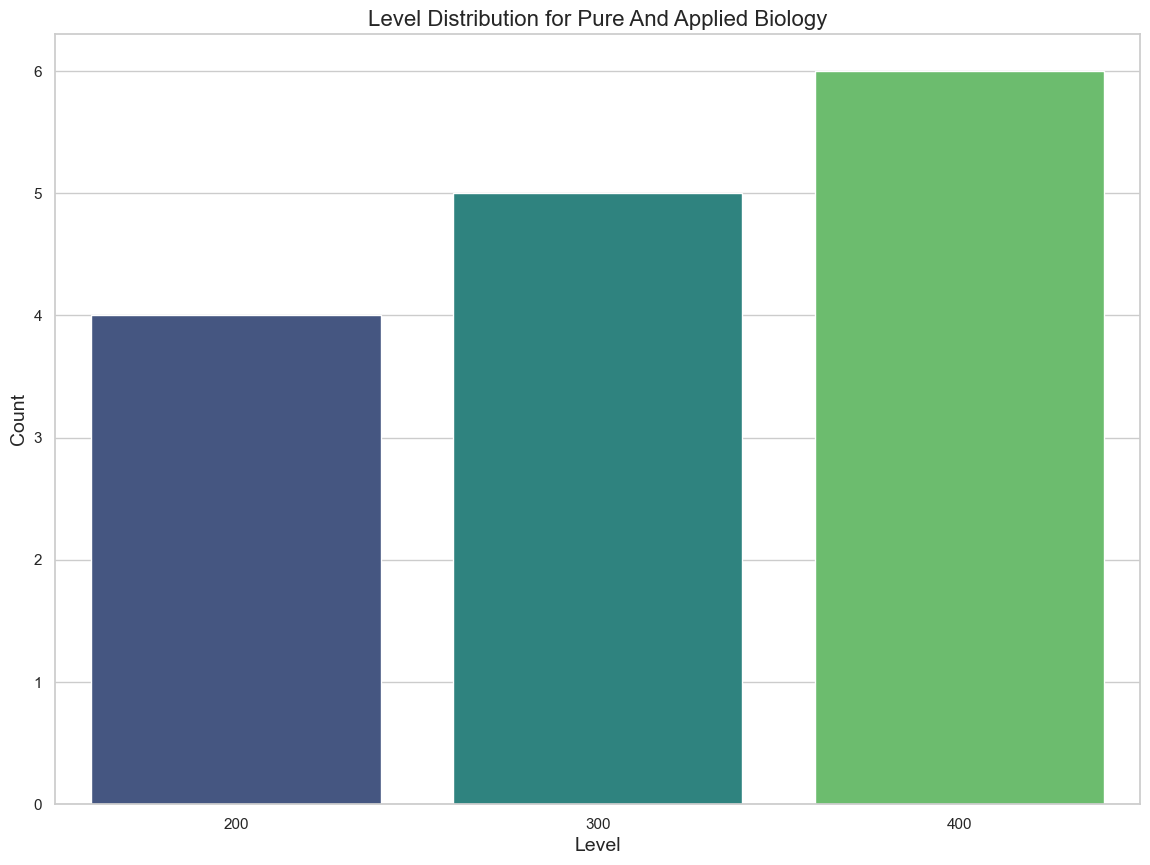

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


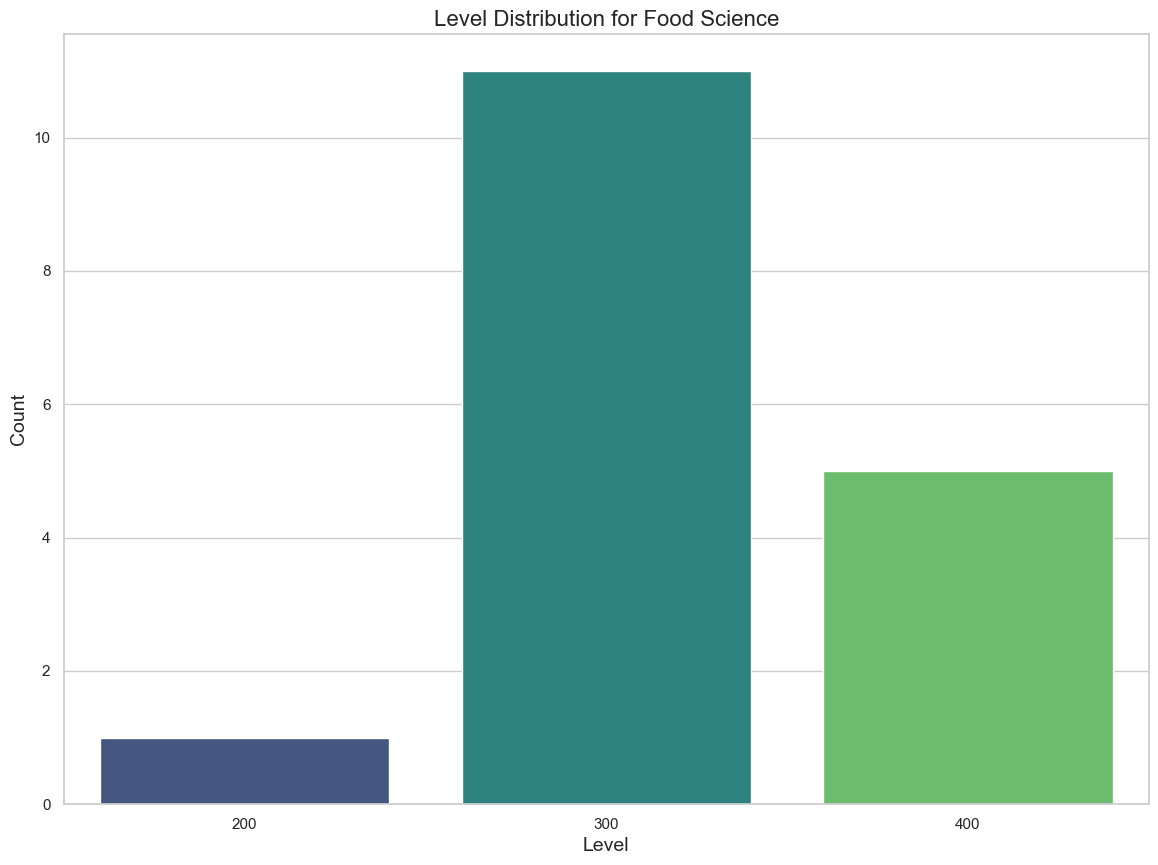

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


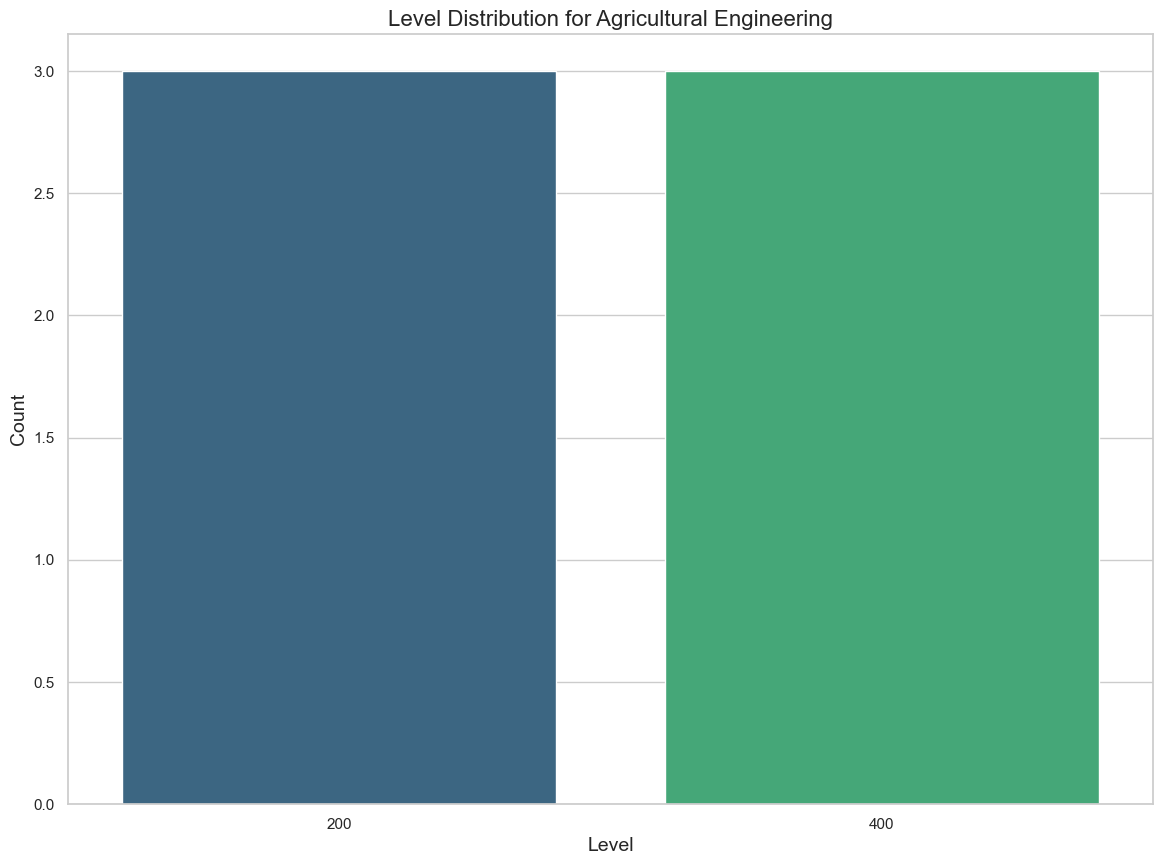

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


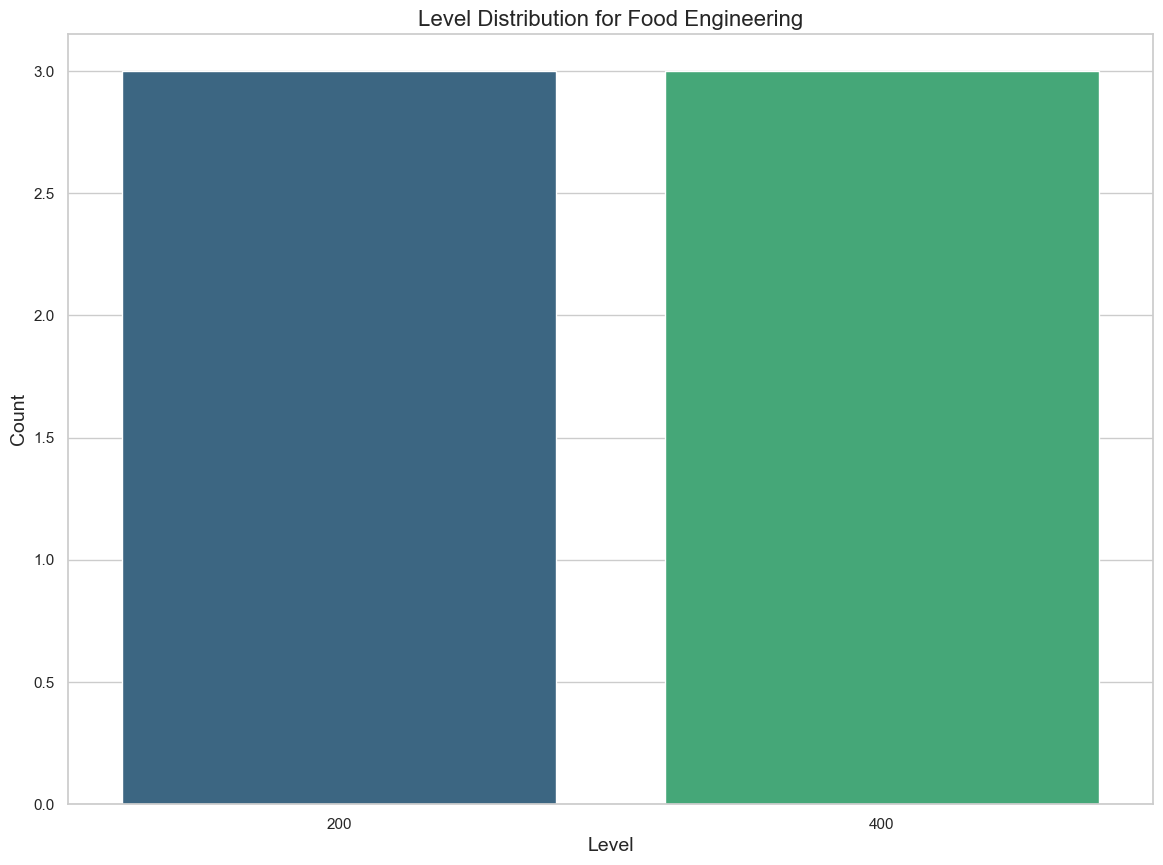

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


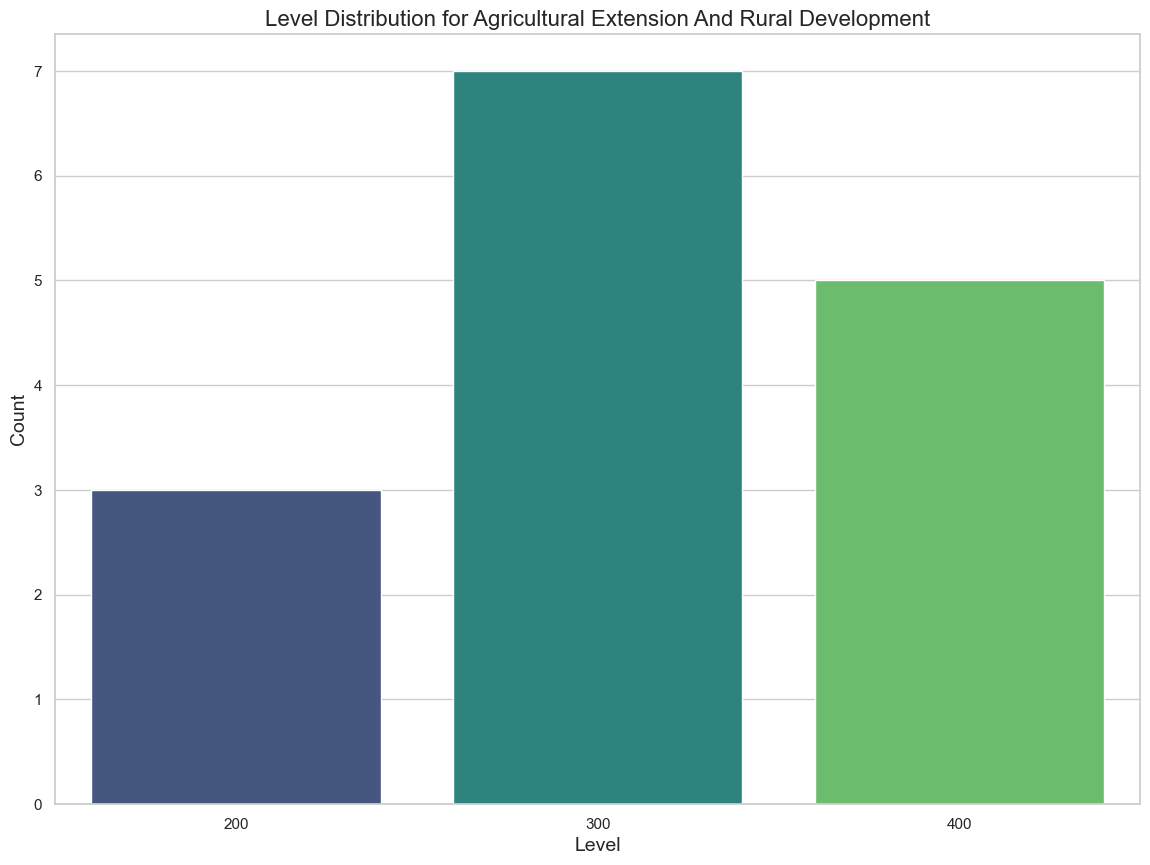

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


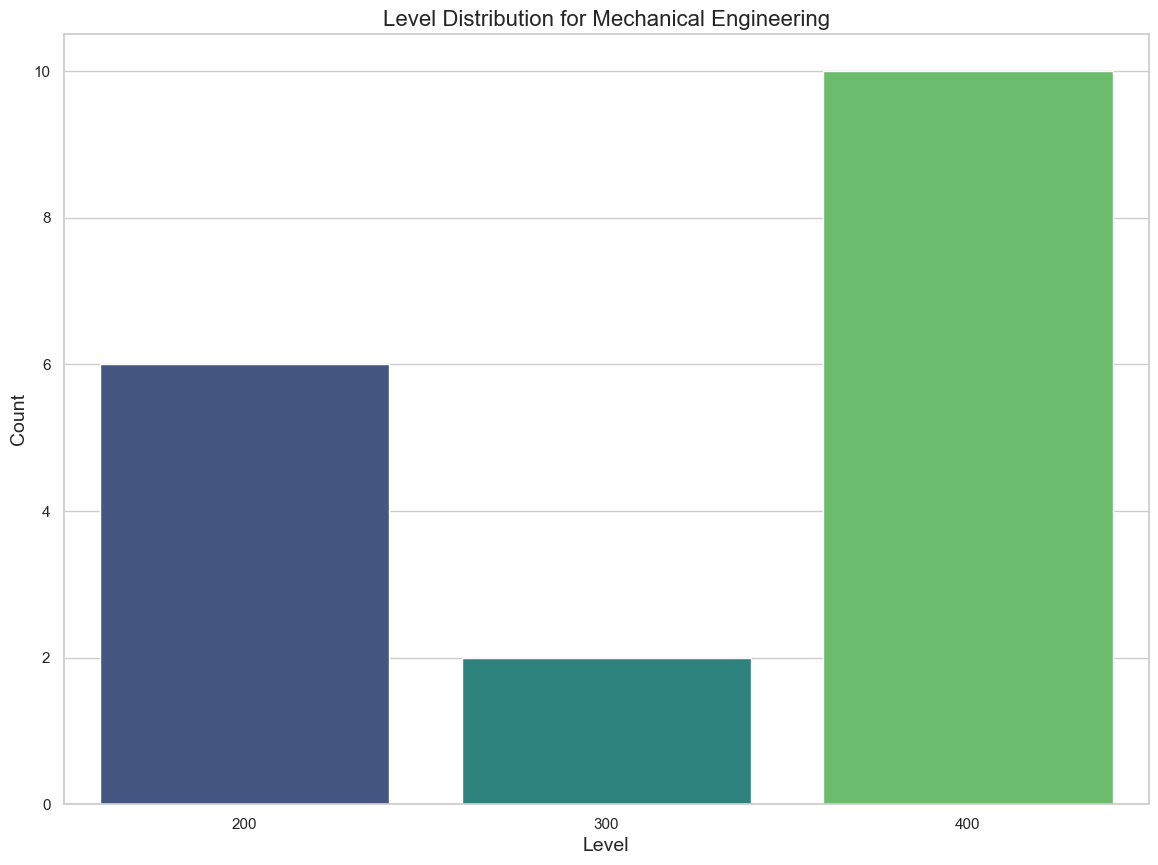

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


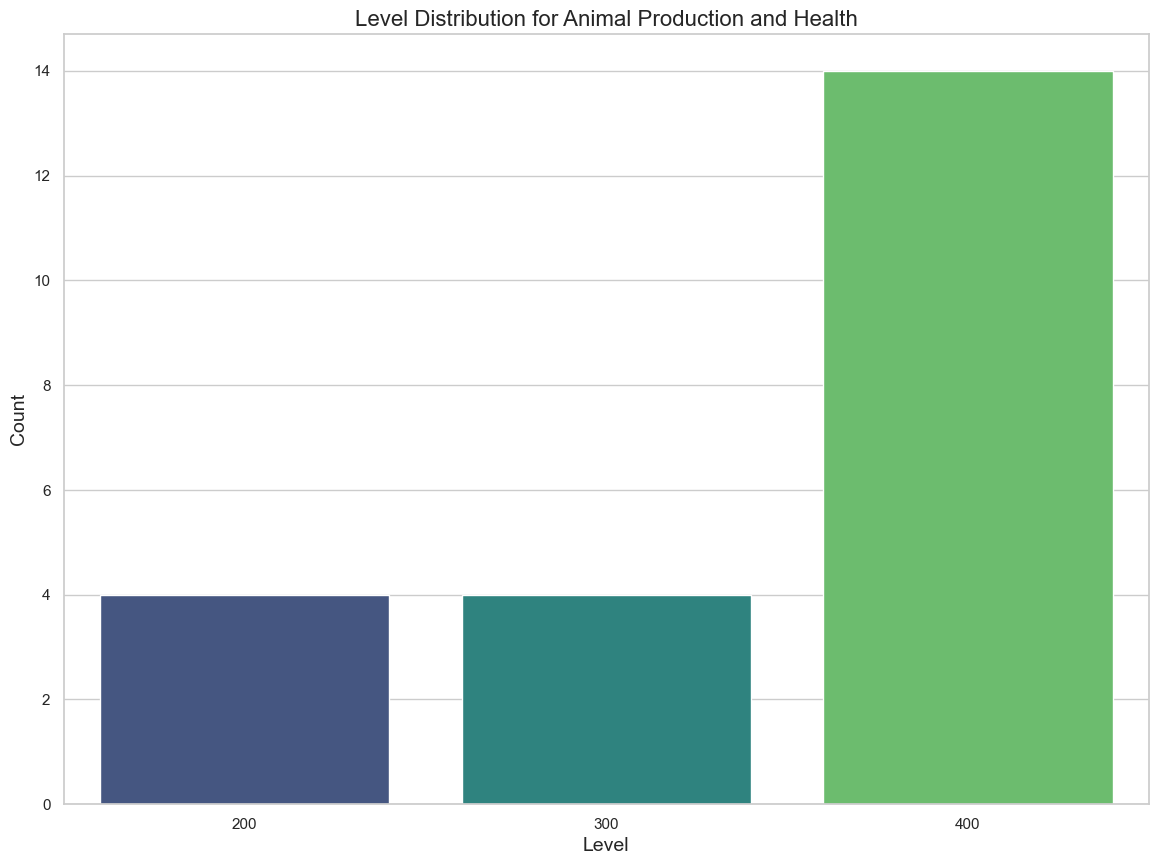

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


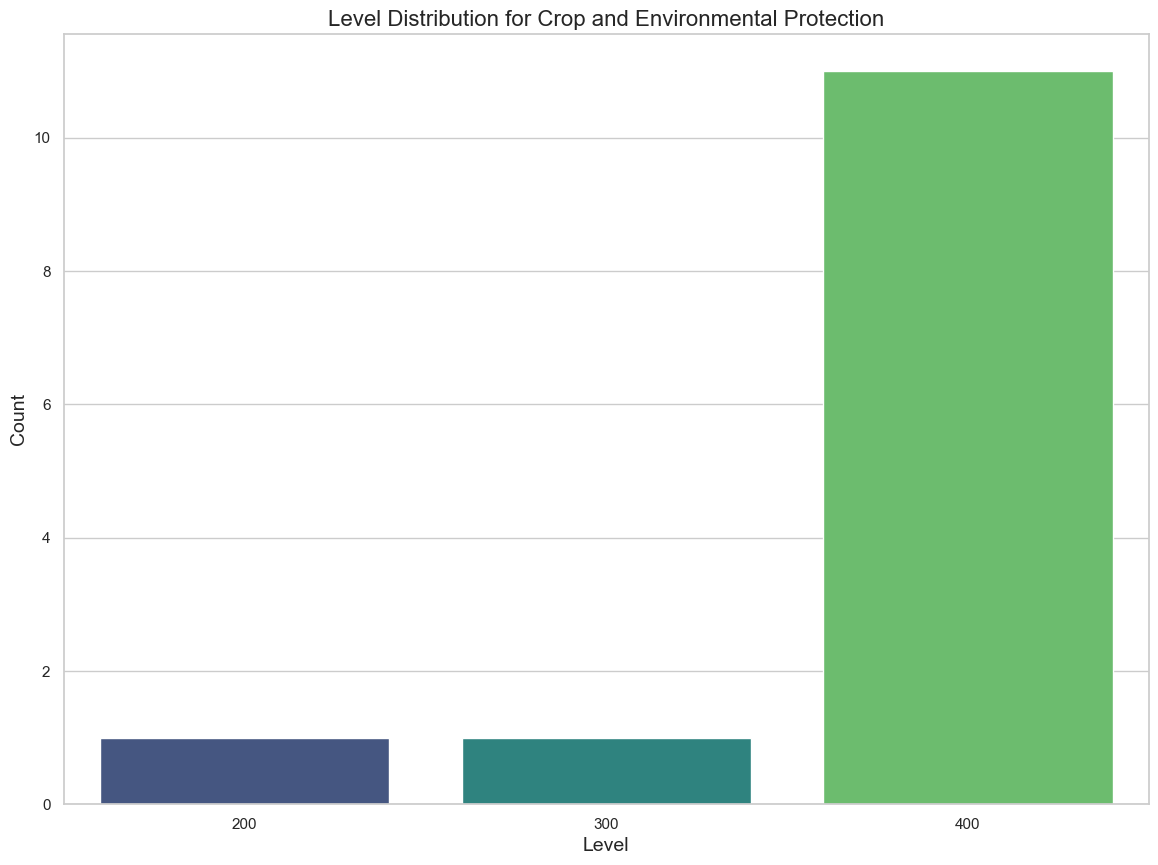

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


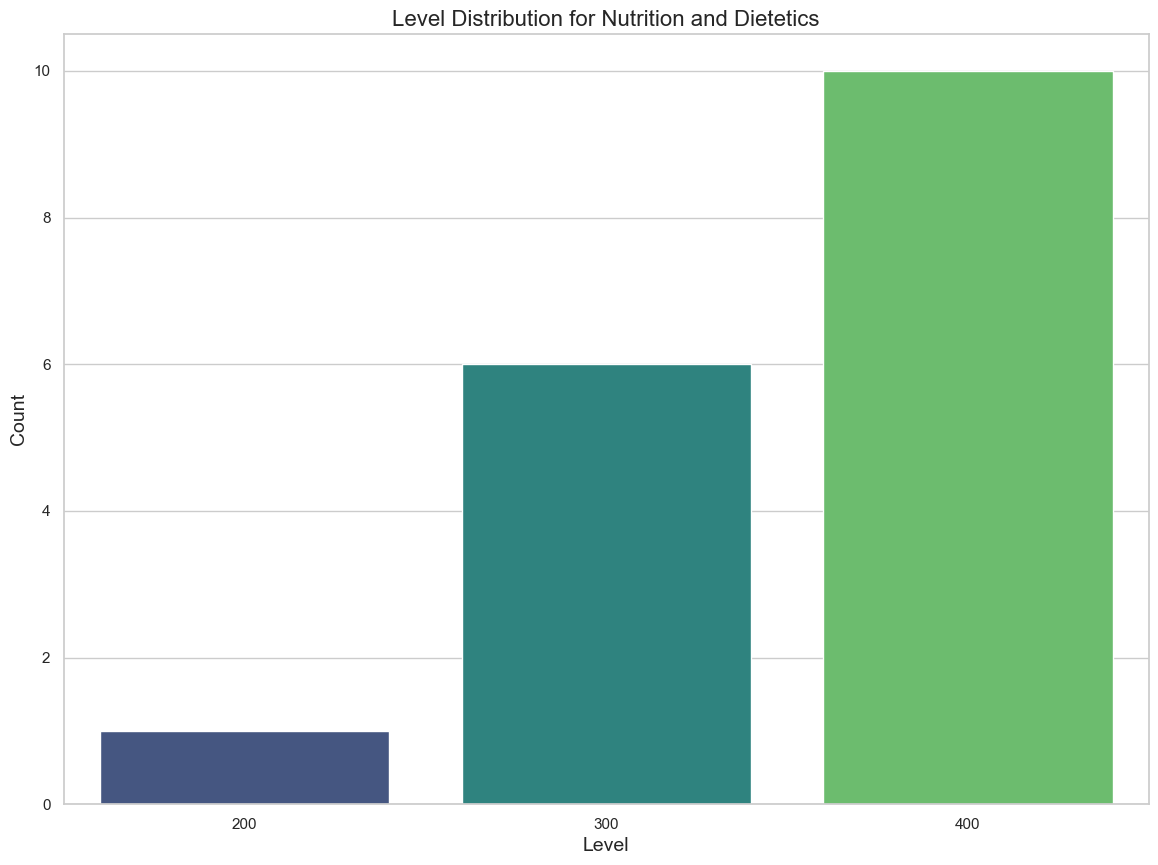

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


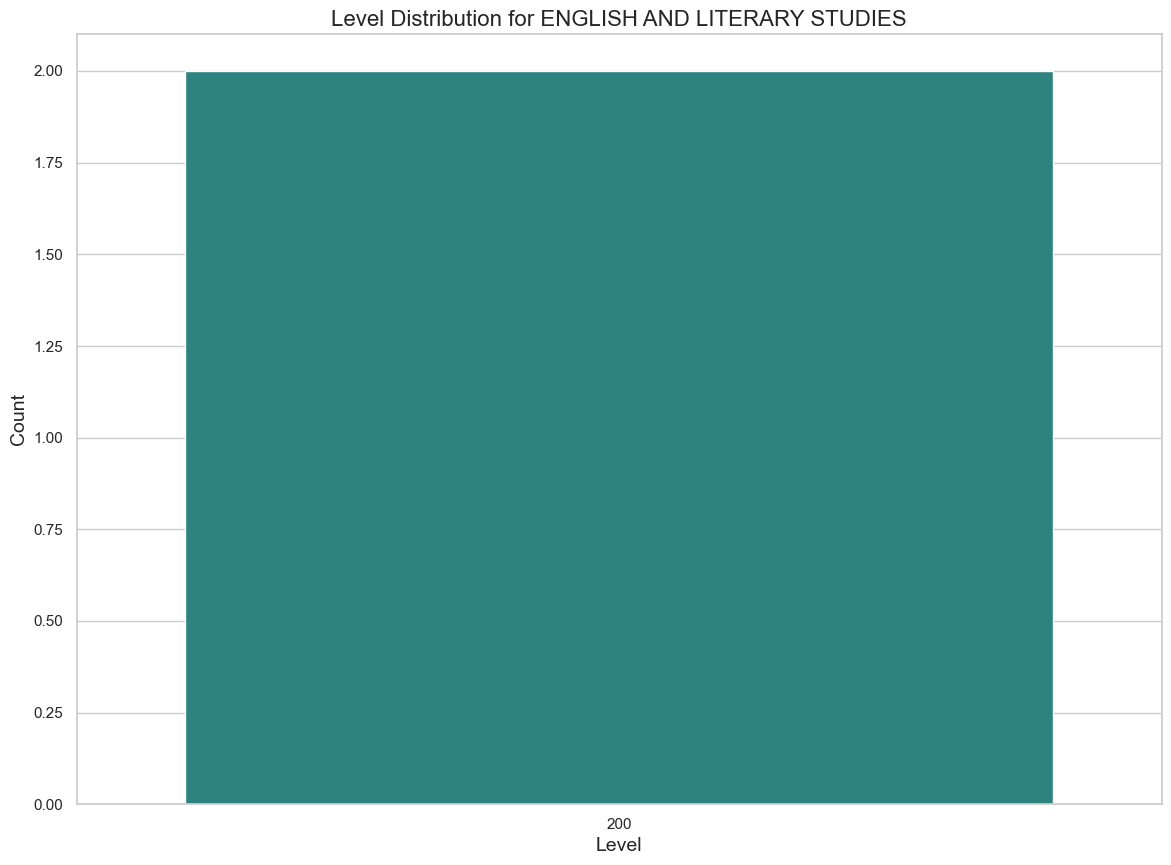

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


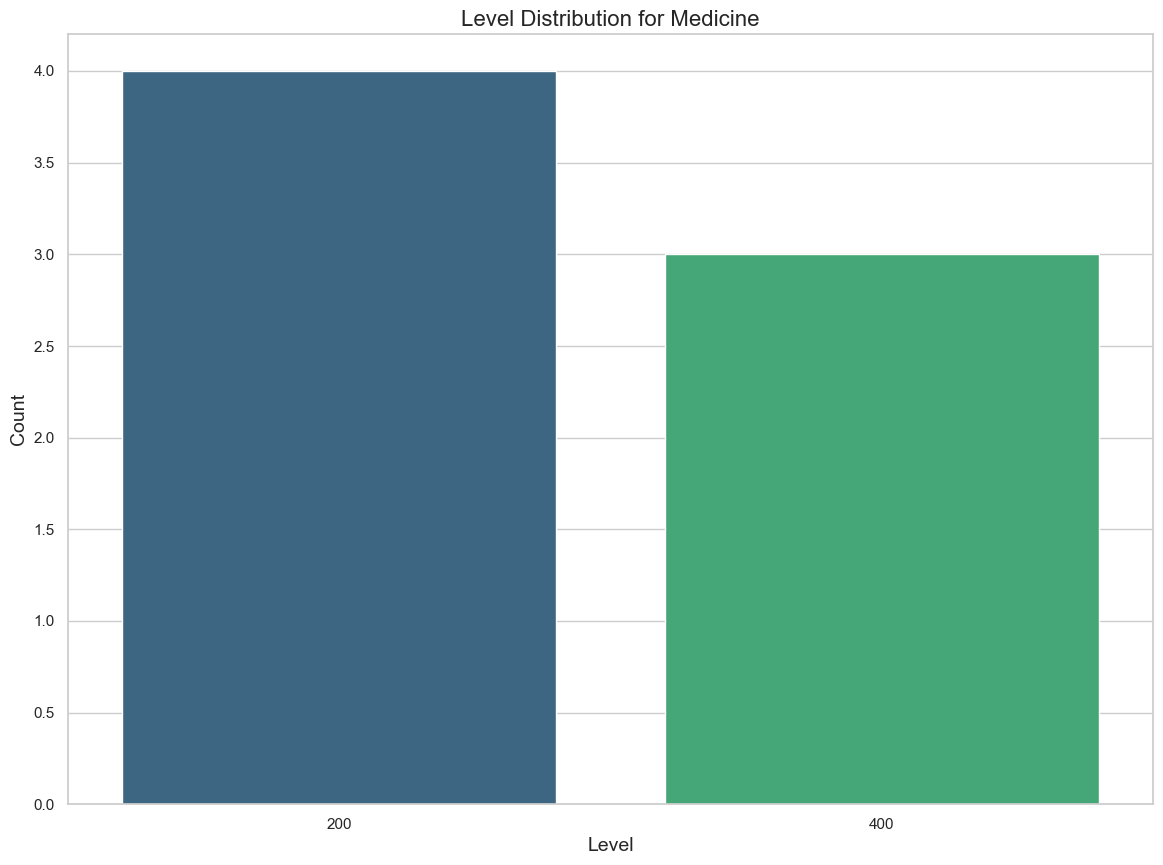

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


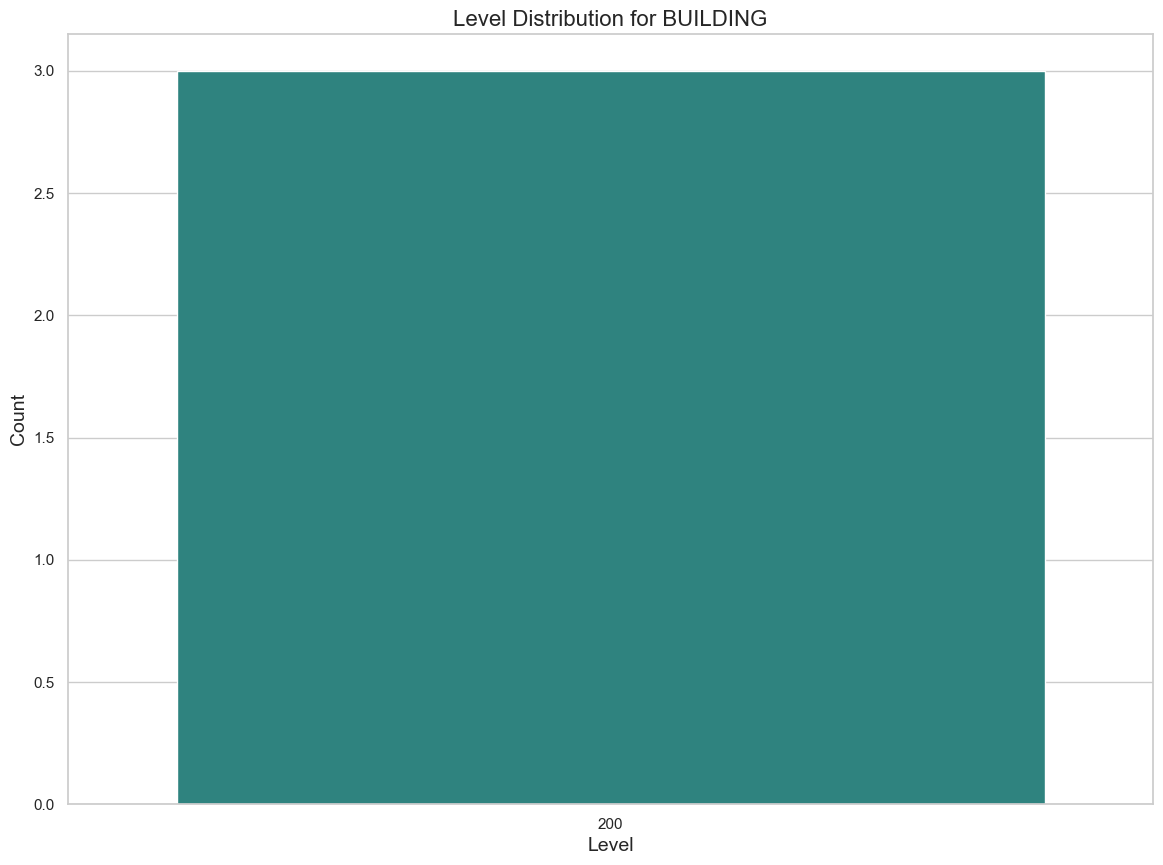

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


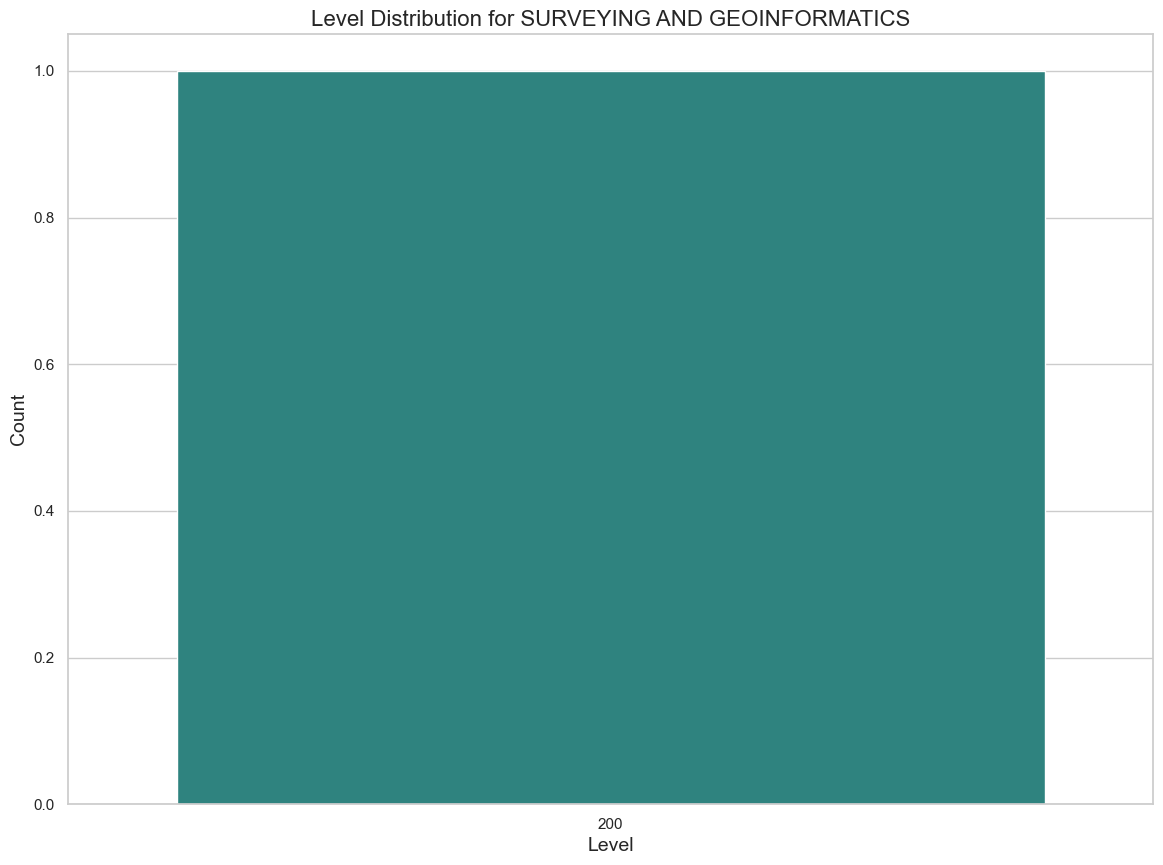

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


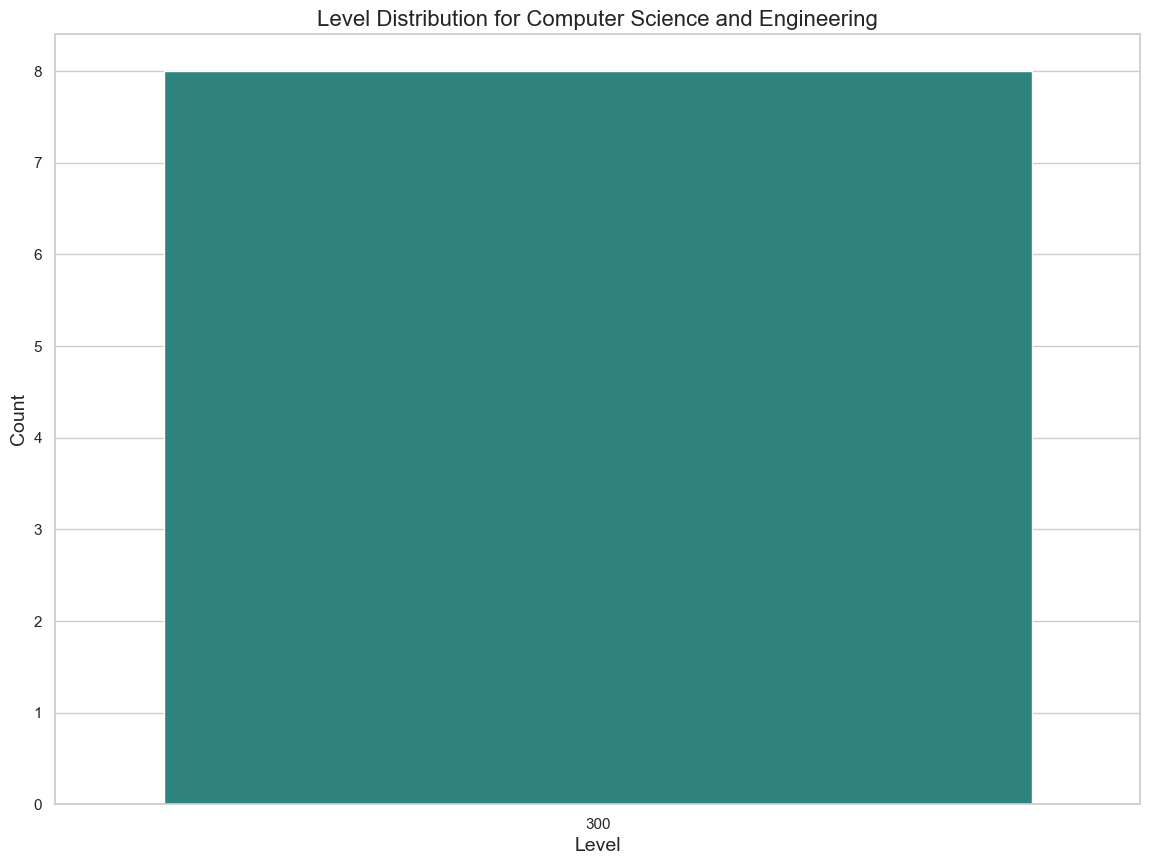

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


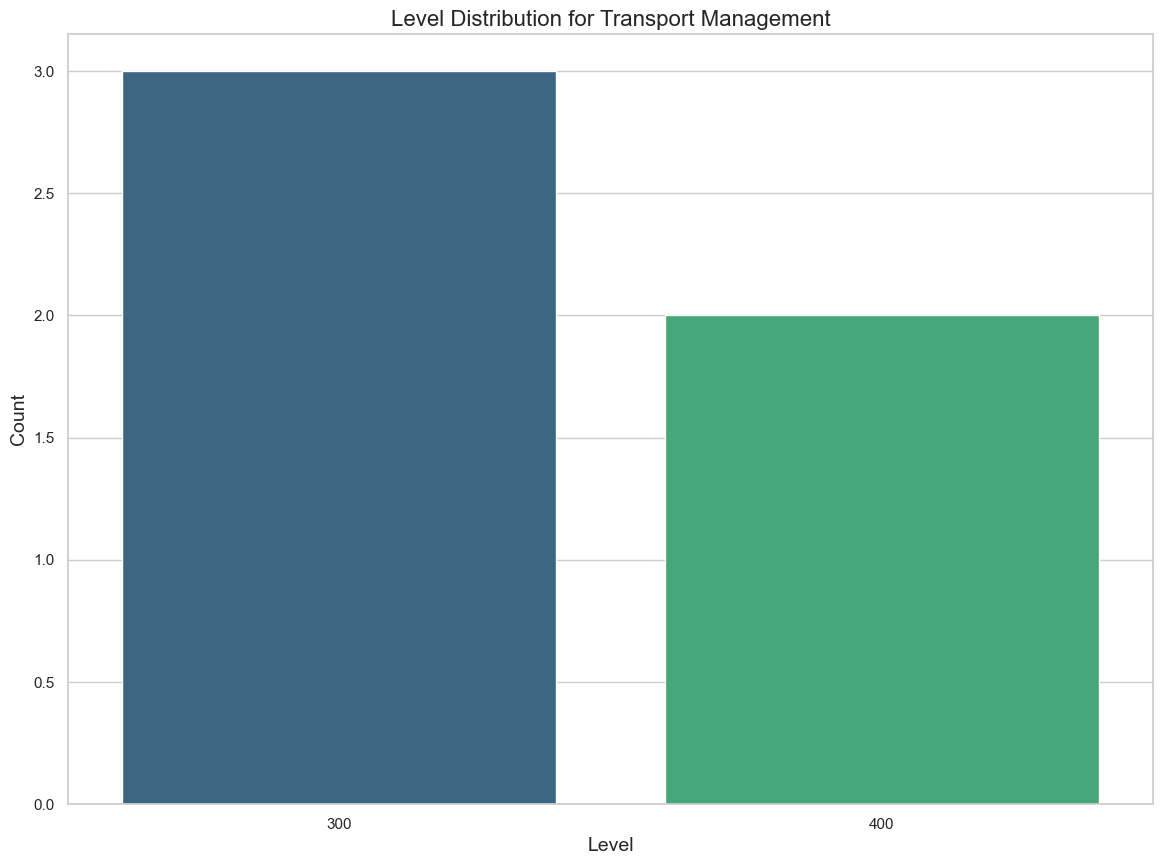

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


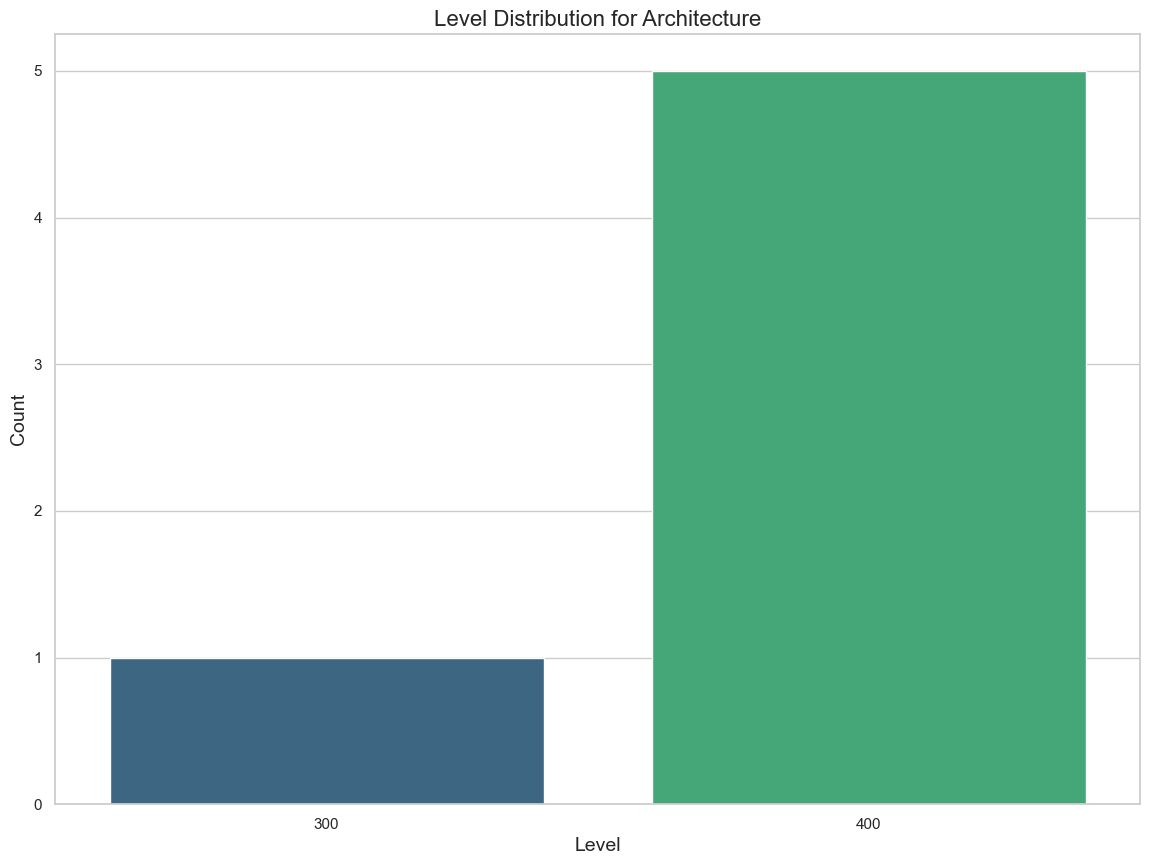

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\190028834.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')


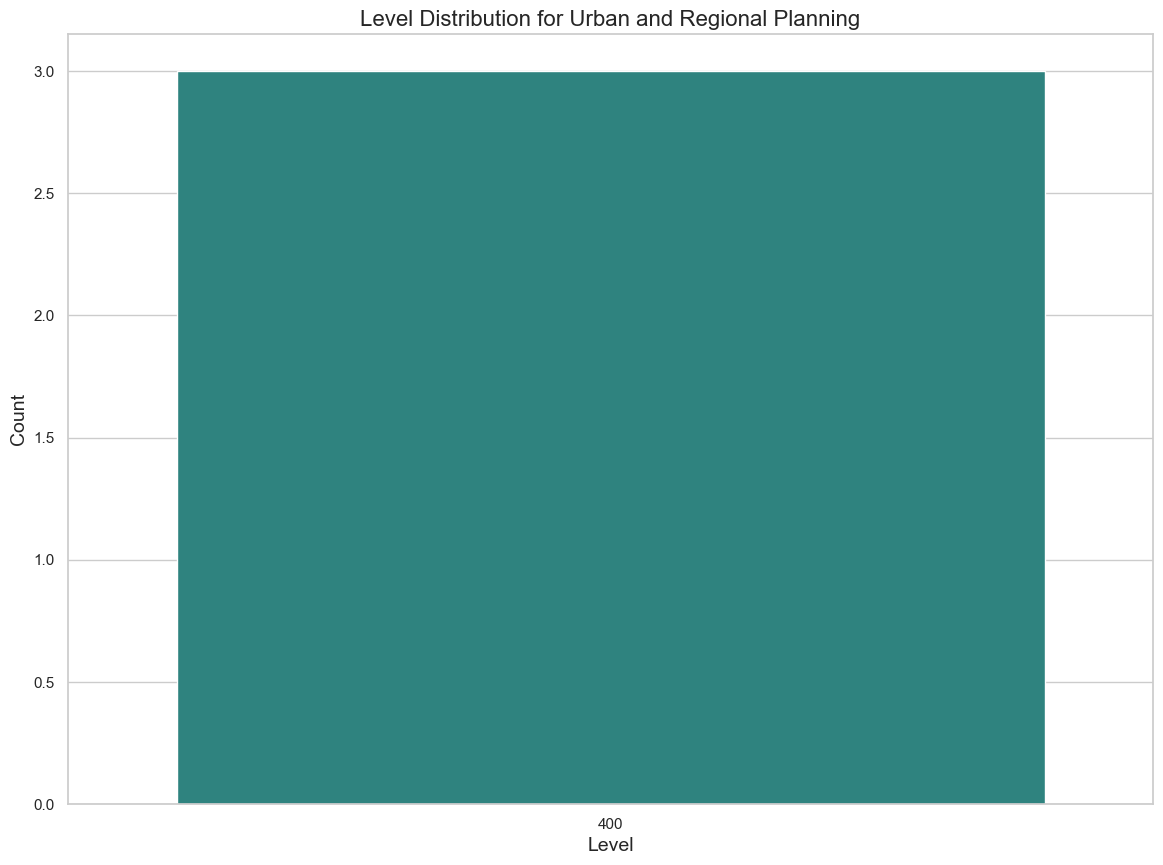

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_level_distribution_by_course(df, course):
    # Filter the DataFrame for the specified course
    df_course = df[df['course_of_study'] == course]
    
    # Set the style for the plots
    sns.set(style="whitegrid")

    # Create a figure with subplots
    fig, ax = plt.subplots(figsize=(14, 10))

    # Plot the distribution of levels for the specified course
    sns.countplot(ax=ax, data=df_course, x='level', palette='viridis')
    ax.set_title(f'Level Distribution for {course}', fontsize=16)
    ax.set_xlabel('Level', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='x', rotation=0)

    # Show the plot
    plt.show()

# Get the unique courses of study
unique_courses = df['course_of_study'].unique()

# Call the function to generate the plots for each course
for course in unique_courses:
    plot_level_distribution_by_course(df, course)

In [53]:
def filter_by_level_and_course(df, level, course_of_study):
    """
    Filters the DataFrame based on the specified level and course of study.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    level (str): The level to filter by.
    course_of_study (str): The course of study to filter by.

    Returns:
    pd.DataFrame: The filtered DataFrame.
    """
    filtered_df = df[(df['level'] == level) & (df['course_of_study'] == course_of_study)]
    return filtered_df


,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study


In [54]:
# Filter DataFrame based on level and course of study
filtered_df = filter_by_level_and_course(df, '400', 'Computer Science')
filtered_df

,sn,first_name,middle_name,last_name,matric_number,account_number,level,course_of_study
348,351,Maleek,Taiwo,Olayinka,2021002112,6555116378,400,Computer Science
371,374,Heritage,Onaolapo,Kolade,2022010954,471437805,400,Computer Science
420,423,Faith,Samuel,Olayiwola,2021005304,8051492818,400,Computer Science
431,434,Shukurat,Olanike,Mojoyinola,2021001388,1527066298,400,Computer Science
441,444,Taofeek,Akorede,Adedokun,2021001114,8160209676,400,Computer Science
442,445,Feranmi,Damilola,Olopade,2021002292,2271354693,400,Computer Science
461,464,Mary,Omotayo,Adewusi,2021004500,2241407604,400,Computer Science
463,466,Ayomide,Oluwadamilare,Adeleke,205555,2126030310,400,Computer Science
471,474,Oreoluwa,Samuel,Babatunde,2021003701,661465454,400,Computer Science
475,478,Ibrahim,Yemi,Aminulahi,2021000003,676873499,400,Computer Science


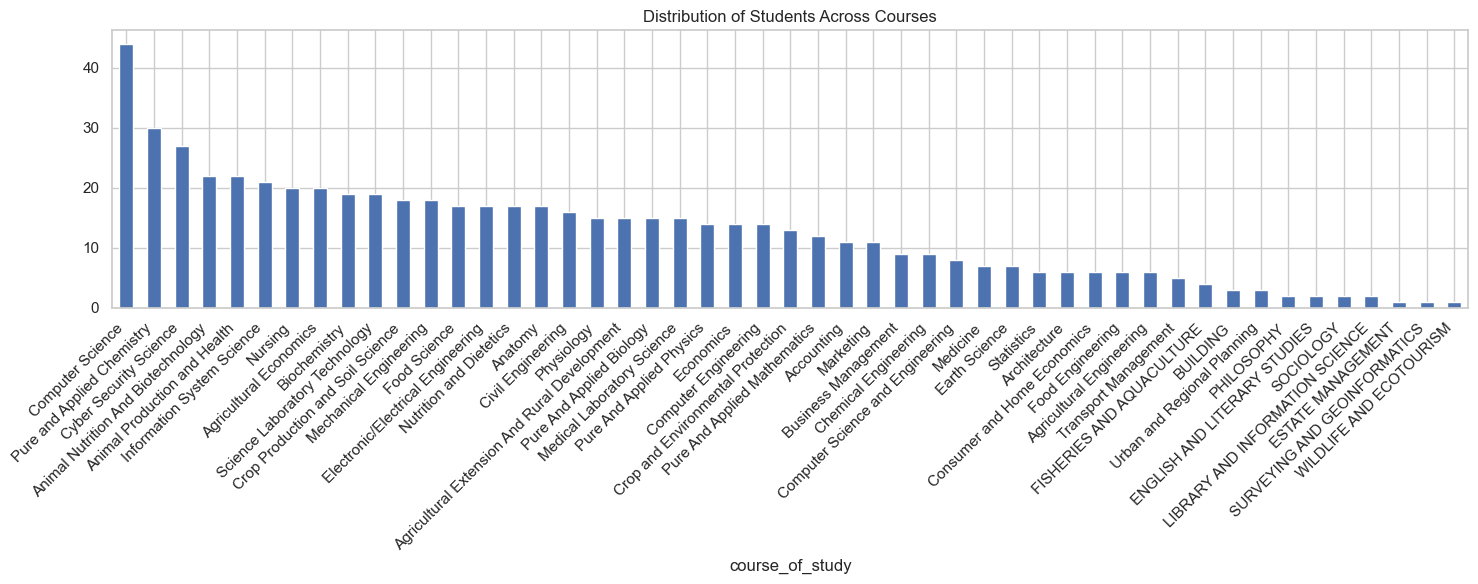

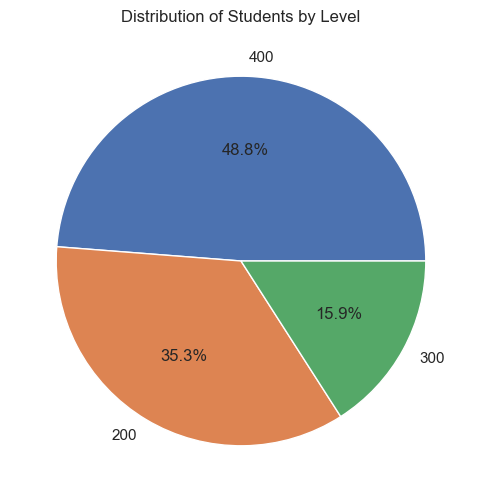

=== Comprehensive Student Data Analysis ===

Total number of students: 609
Number of unique courses: 49

Most Common First Names:
first_name
Samuel        13
Ayomide        9
Esther         8
Abdullahi      8
Praise         8
Eniola         8
Precious       7
Boluwatife     7
Peter          6
Favour         6
Name: count, dtype: int64

Most Common Last Names:
last_name
Ojo          8
Adeleke      7
Lawal        7
Adebayo      7
Alabi        6
Babatunde    5
Olayiwola    5
Azeez        5
Adeniran     5
Olatunji     5
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\2773585381.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['course_family'] = df['course_of_study'].apply(lambda x:


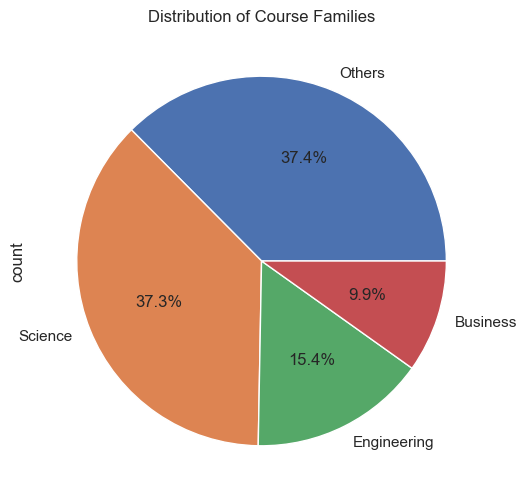

C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\662391868.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=top_first_names.values, y=top_first_names.index, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7560\662391868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=top_last_names.values, y=top_last_names.index, palette='viridis')


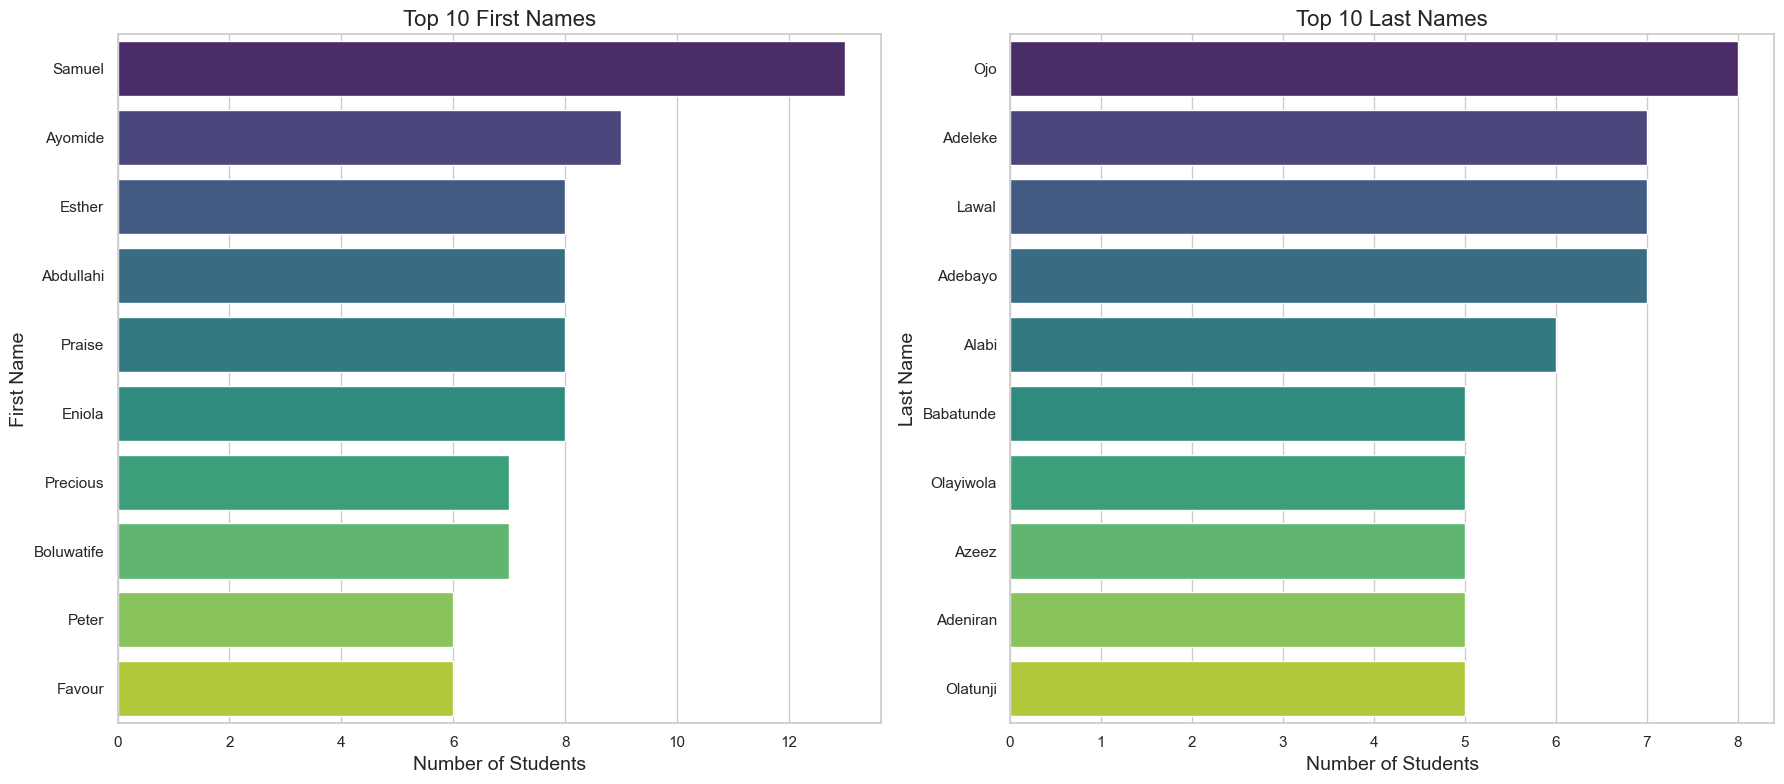